## Statistics
Having a solid understanding of statistics in data science allows us to understand our data better, and allows us to create a quantifiable evaluation of any future conclusions.

In [1]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using MLBase

In [2]:
default(
    size=(800, 600),
    dpi=300,
)

In this notebook, we will use eruption data on the faithful geyser. The data will contain wait times between every consecutive times the geyser goes off and the length of the eruptions.

Let's get the data first...

In [3]:
D = dataset("datasets","faithful")
@show names(D)
D[1:10, :]

names(D) = ["Eruptions", "Waiting"]


10×2 DataFrame
 Row │ Eruptions  Waiting 
     │ Float64    Int64   
─────┼────────────────────
   1 │     3.6         79
   2 │     1.8         54
   3 │     3.333       74
   4 │     2.283       62
   5 │     4.533       85
   6 │     2.883       55
   7 │     4.7         88
   8 │     3.6         85
   9 │     1.95        51
  10 │     4.35        85

In [4]:
describe(D)

2×7 DataFrame
 Row │ variable   mean      min   median   max   nmissing  eltype   
     │ Symbol     Float64   Real  Float64  Real  Int64     DataType 
─────┼──────────────────────────────────────────────────────────────
   1 │ Eruptions   3.48778   1.6      4.0   5.1         0  Float64
   2 │ Waiting    70.8971   43       76.0  96           0  Int64

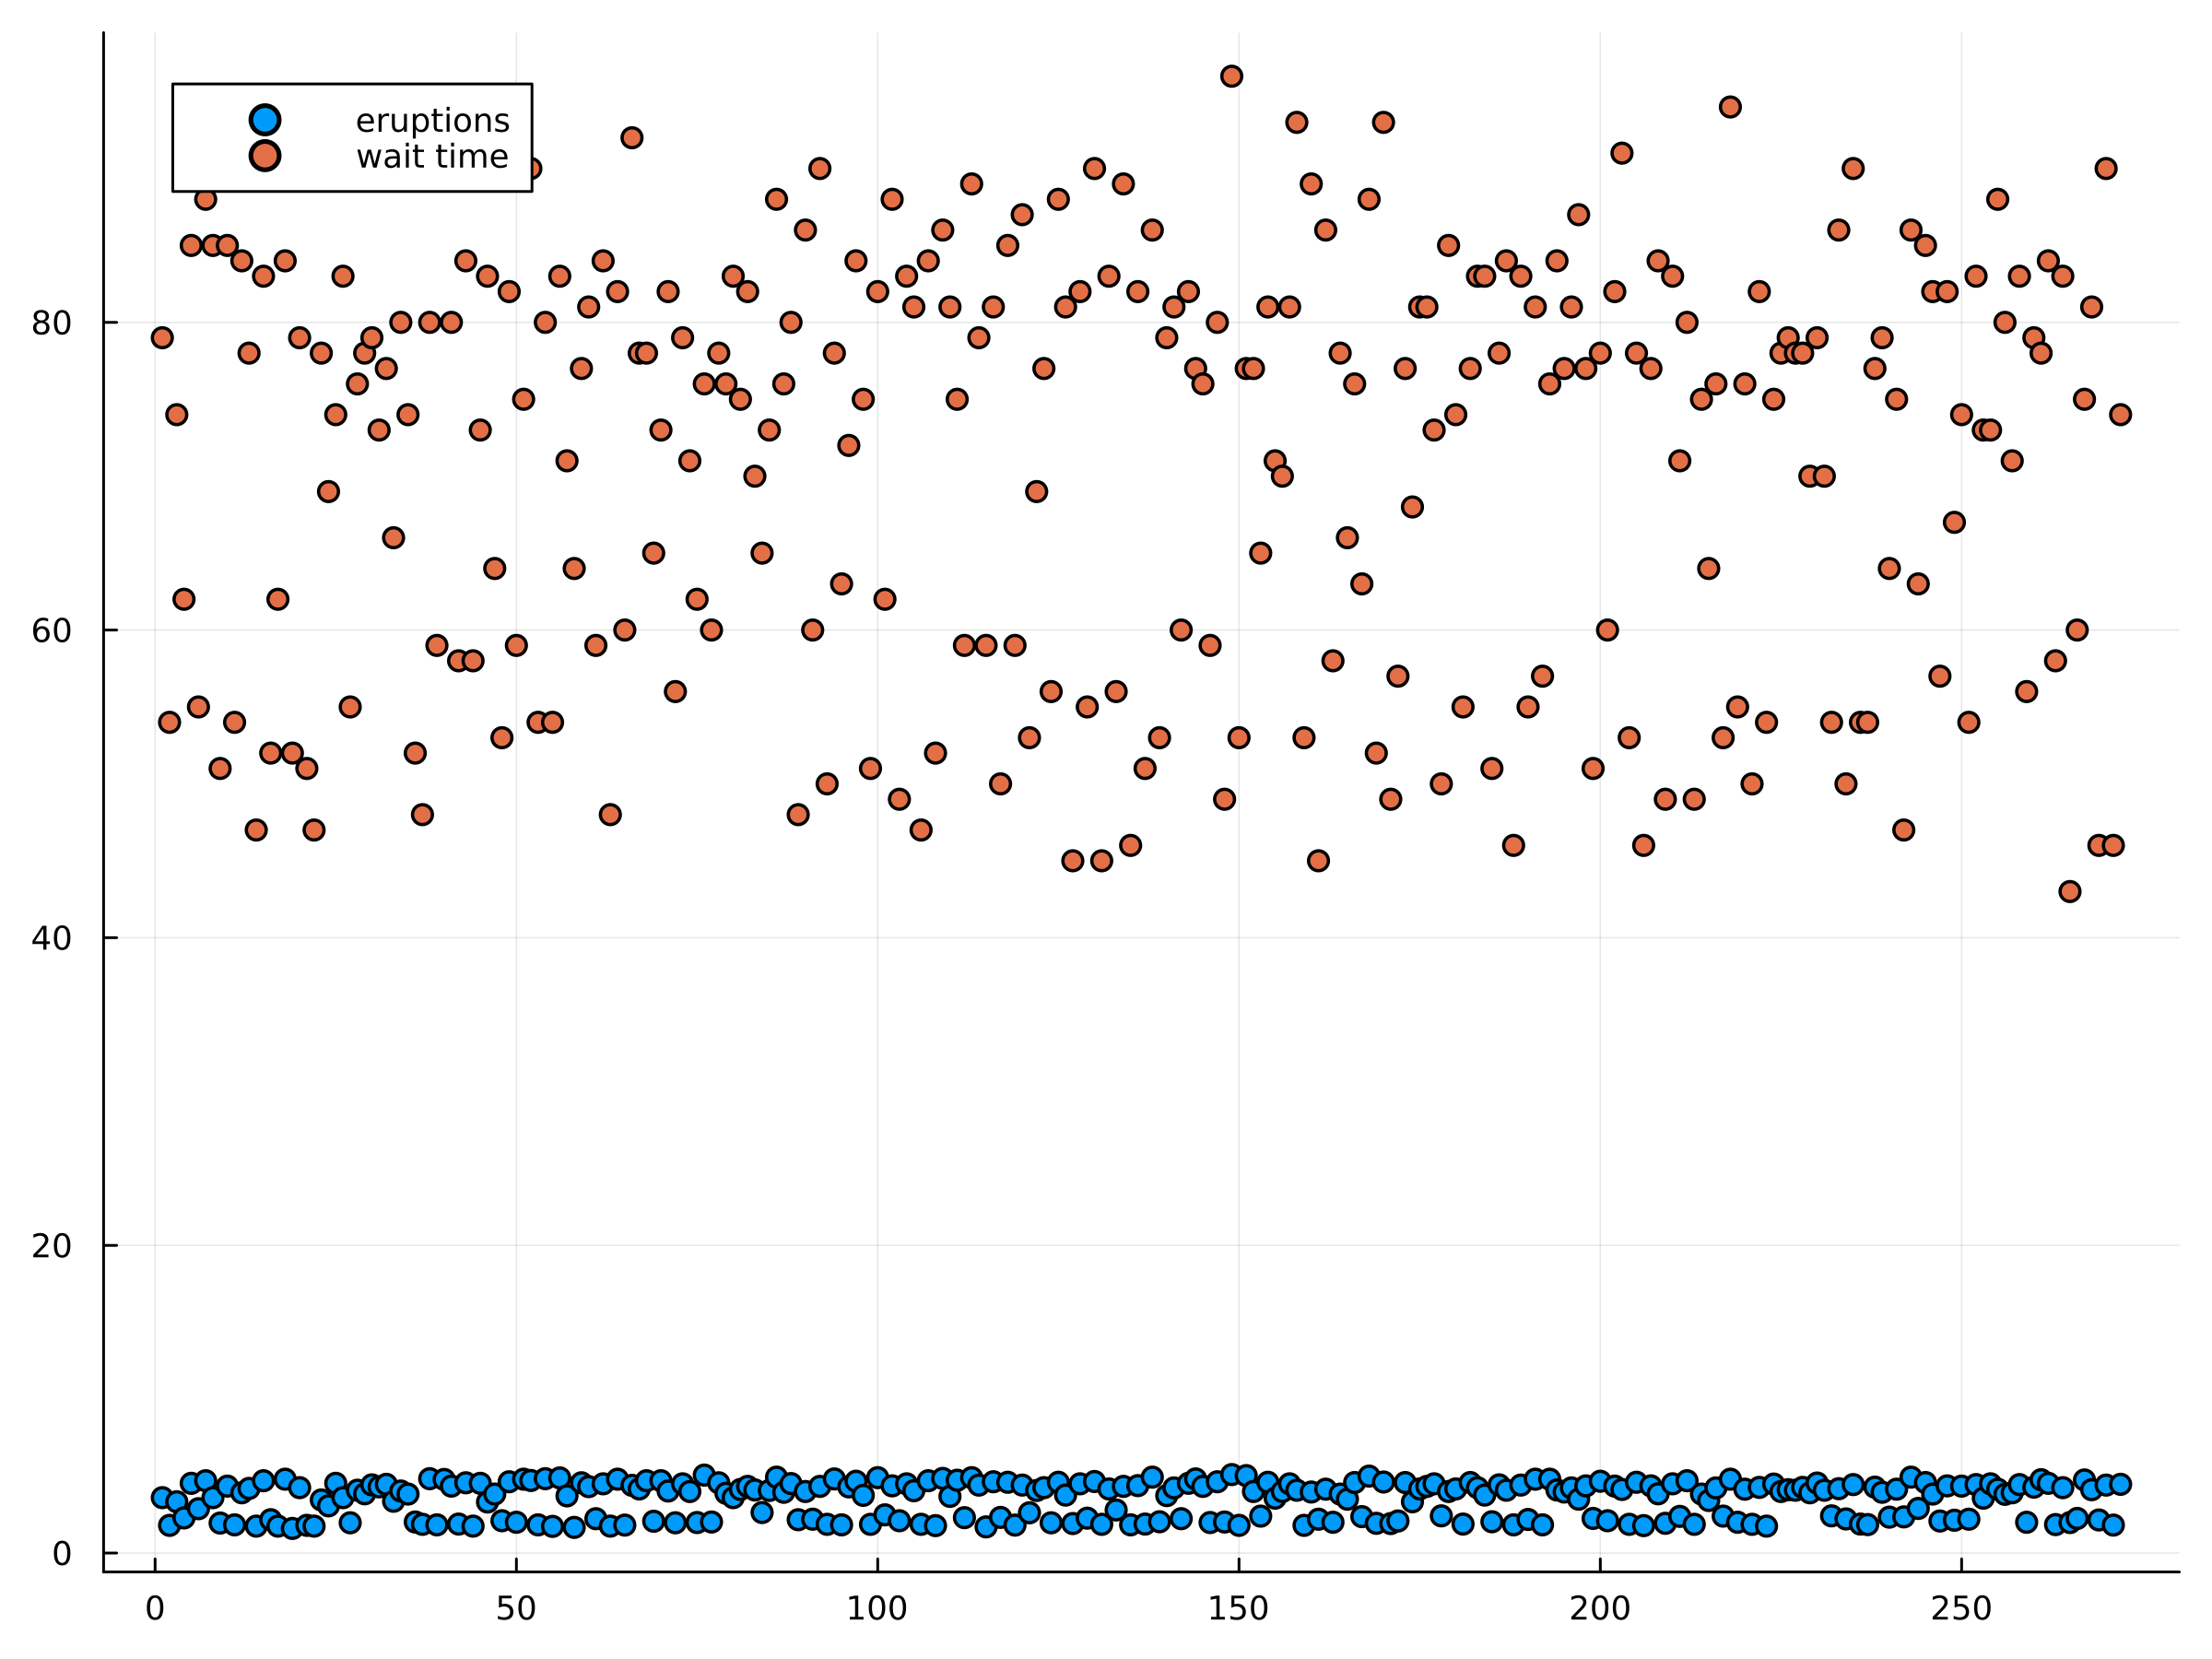

In [5]:
eruptions = D[!,:Eruptions]
scatter(eruptions,label="eruptions")
waittime = D[!,:Waiting]
scatter!(waittime,label="wait time")

### 🔵Statistics plots
As you can see, this doesn't tell us much about the data... Let's try some statistical plots

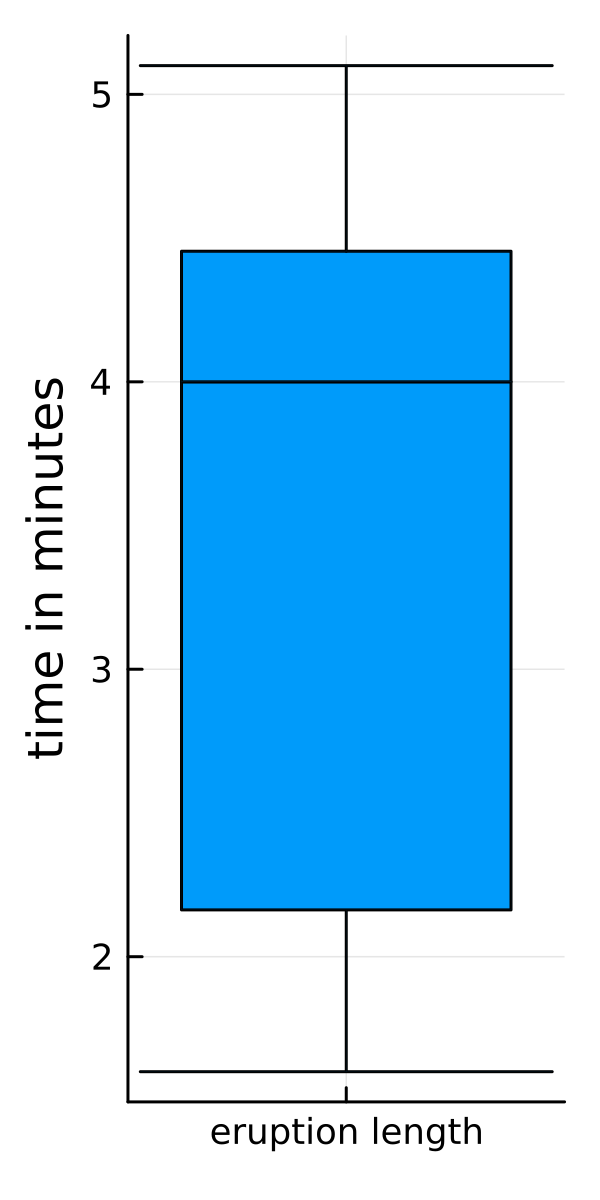

In [6]:
boxplot(["eruption length"],eruptions,legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

Statistical plots such as a box plot (and a violin plot as we will see in notebook `12. Visualization`), can provide a much better understanding of the data. Here, we immediately see that the median time of each eruption is about 4 minutes.

The next plot we will see is a histogram plot.

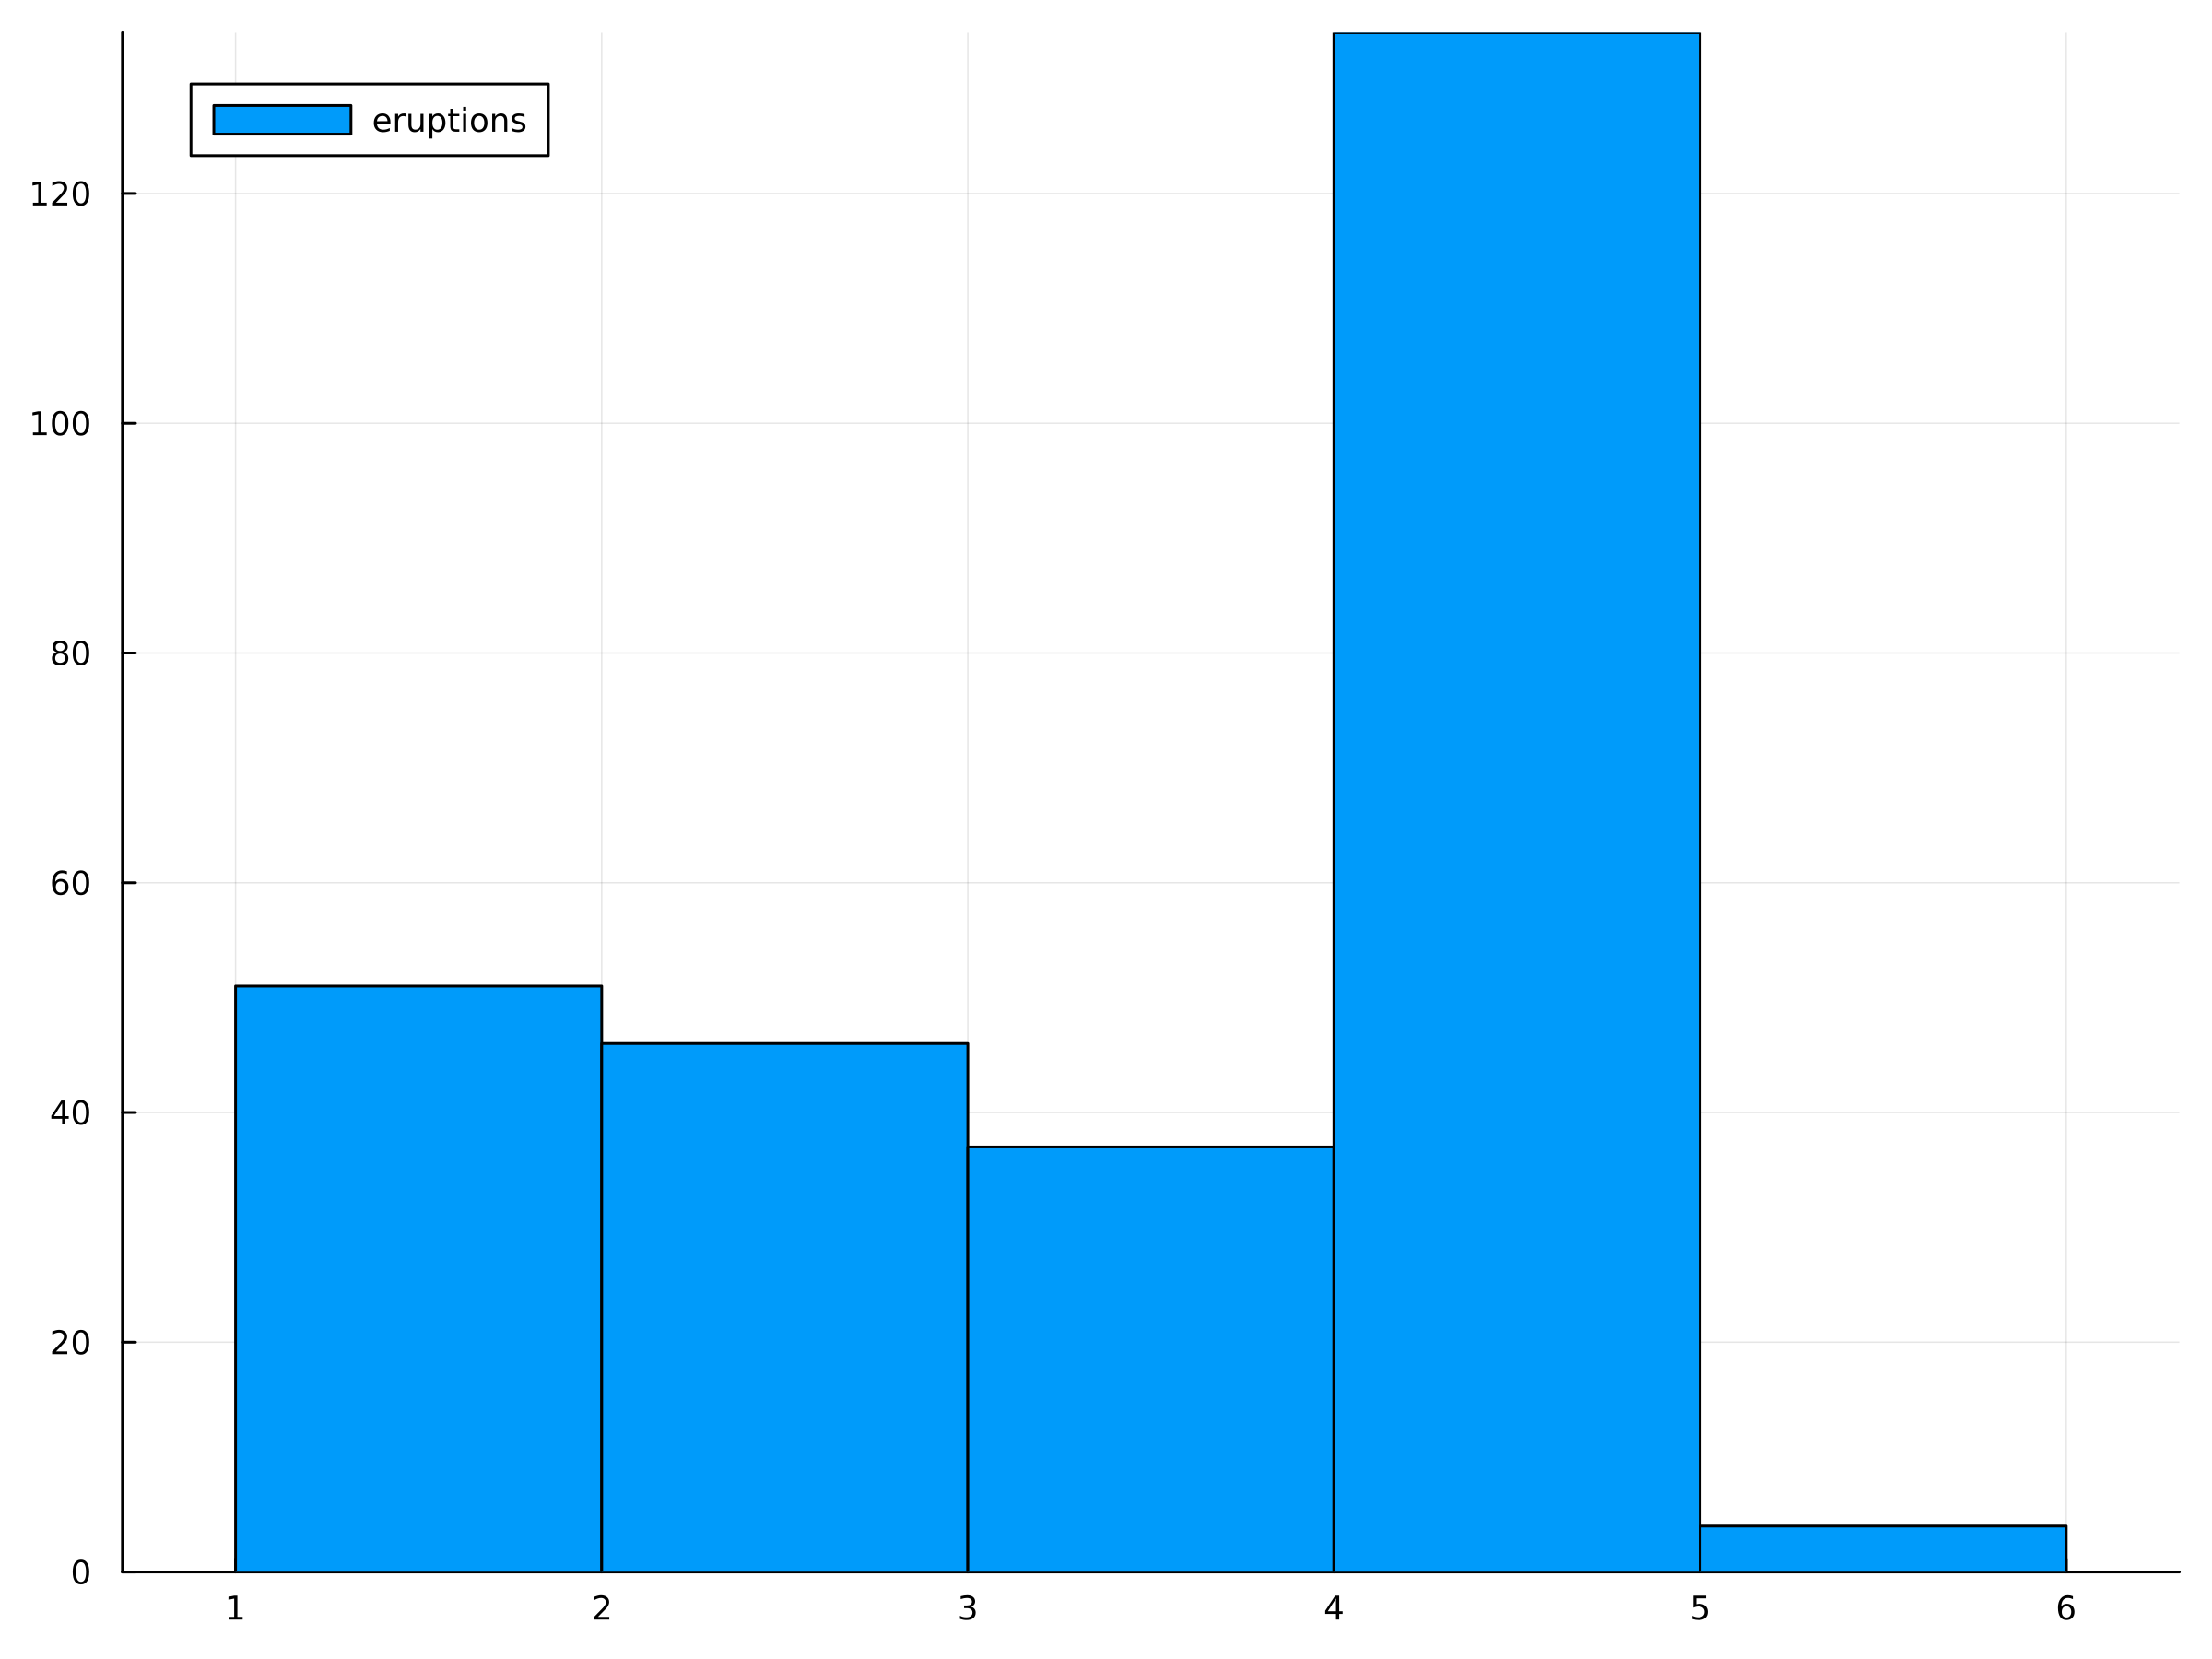

In [7]:
histogram(eruptions,label="eruptions")

You can adjust the number of bins manually or by passing a one of the autobinning functions.

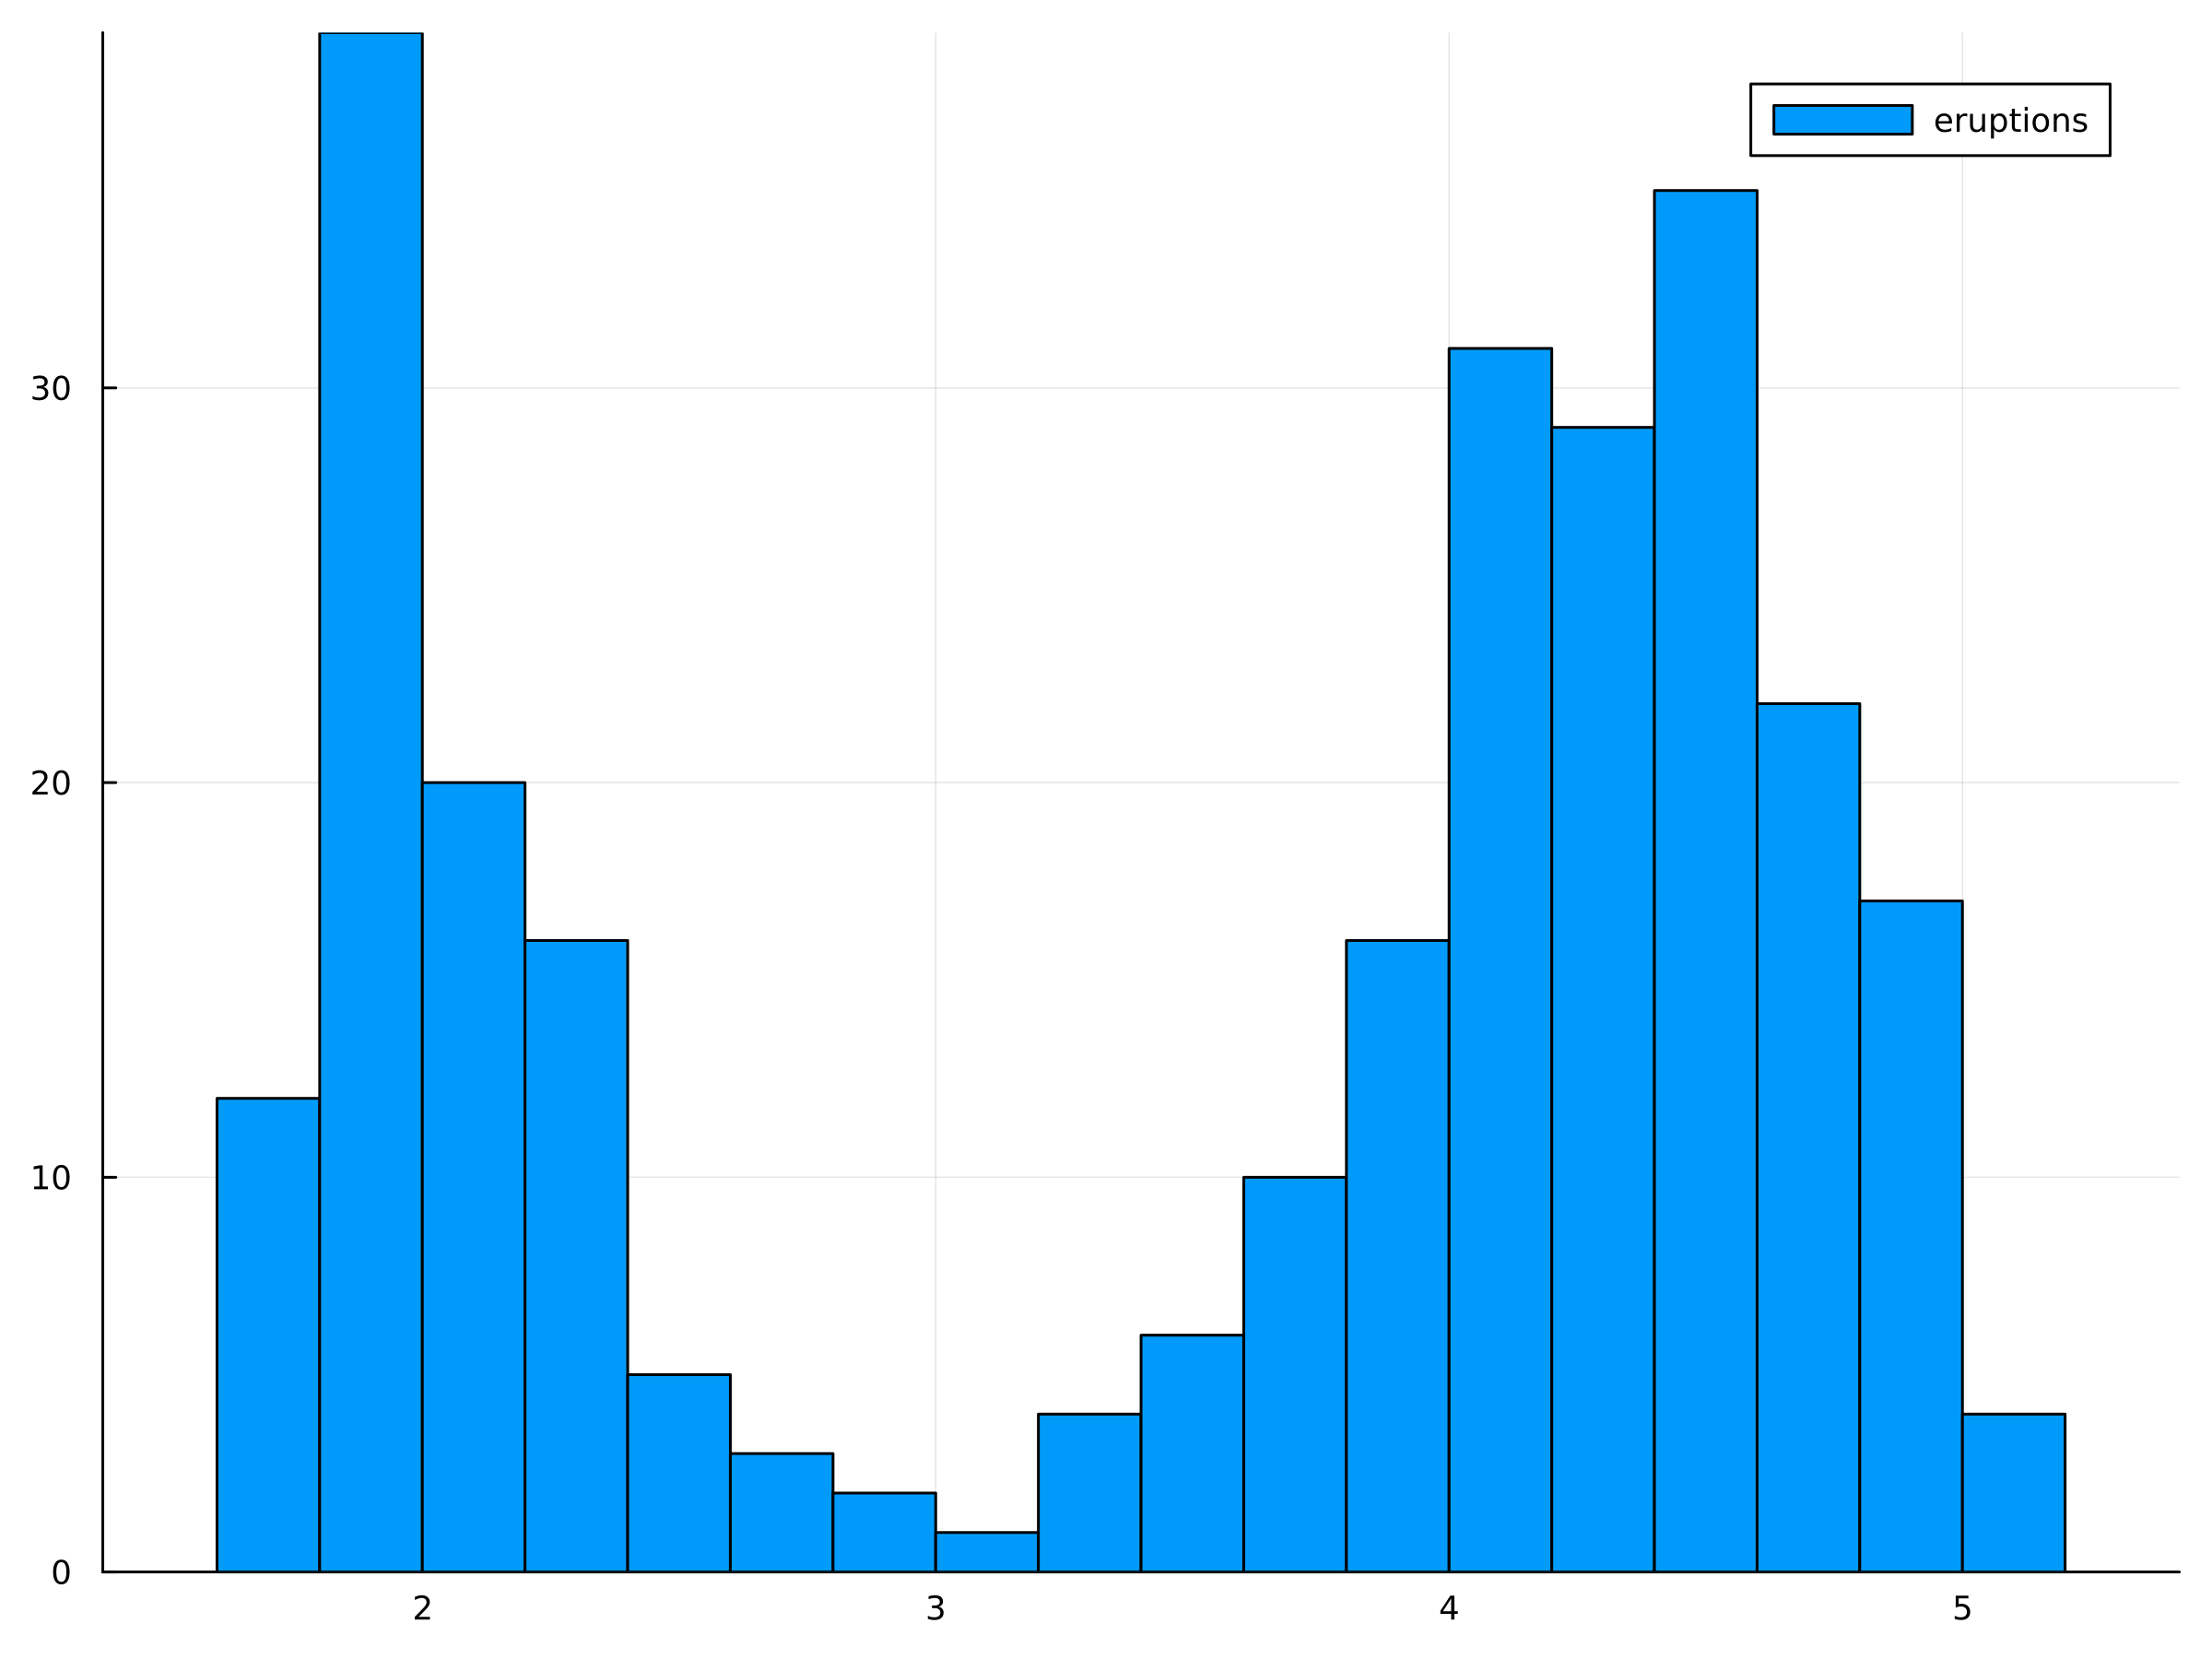

In [8]:
histogram(eruptions,bins=:sqrt,label="eruptions")

### 🔵Kernel density estimates
Next, we will see how we can fit a kernel density estimation function to our data. We will make use of the `KernelDensity.jl` package. 

In [9]:
p=kde(eruptions)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794655723e-5, 1.1743789689266926e-5, 1.1911063348919726e-5, 1.2095731053138326e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627797389e-5, 1.113759304488017e-5, 1.1076192604056456e-5, 1.1030781609218734e-5, 1.1001338720893414e-5, 1.0987860983070058e-5, 1.0990363864678623e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

If we want the histogram and the kernel density graph to be aligned we need to remember that the "density contribution" of every point added to one of these histograms is `1/(nb of elements)*bin width`. Read more about kernel density estimates on its wikipedia page https://en.wikipedia.org/wiki/Kernel_density_estimation

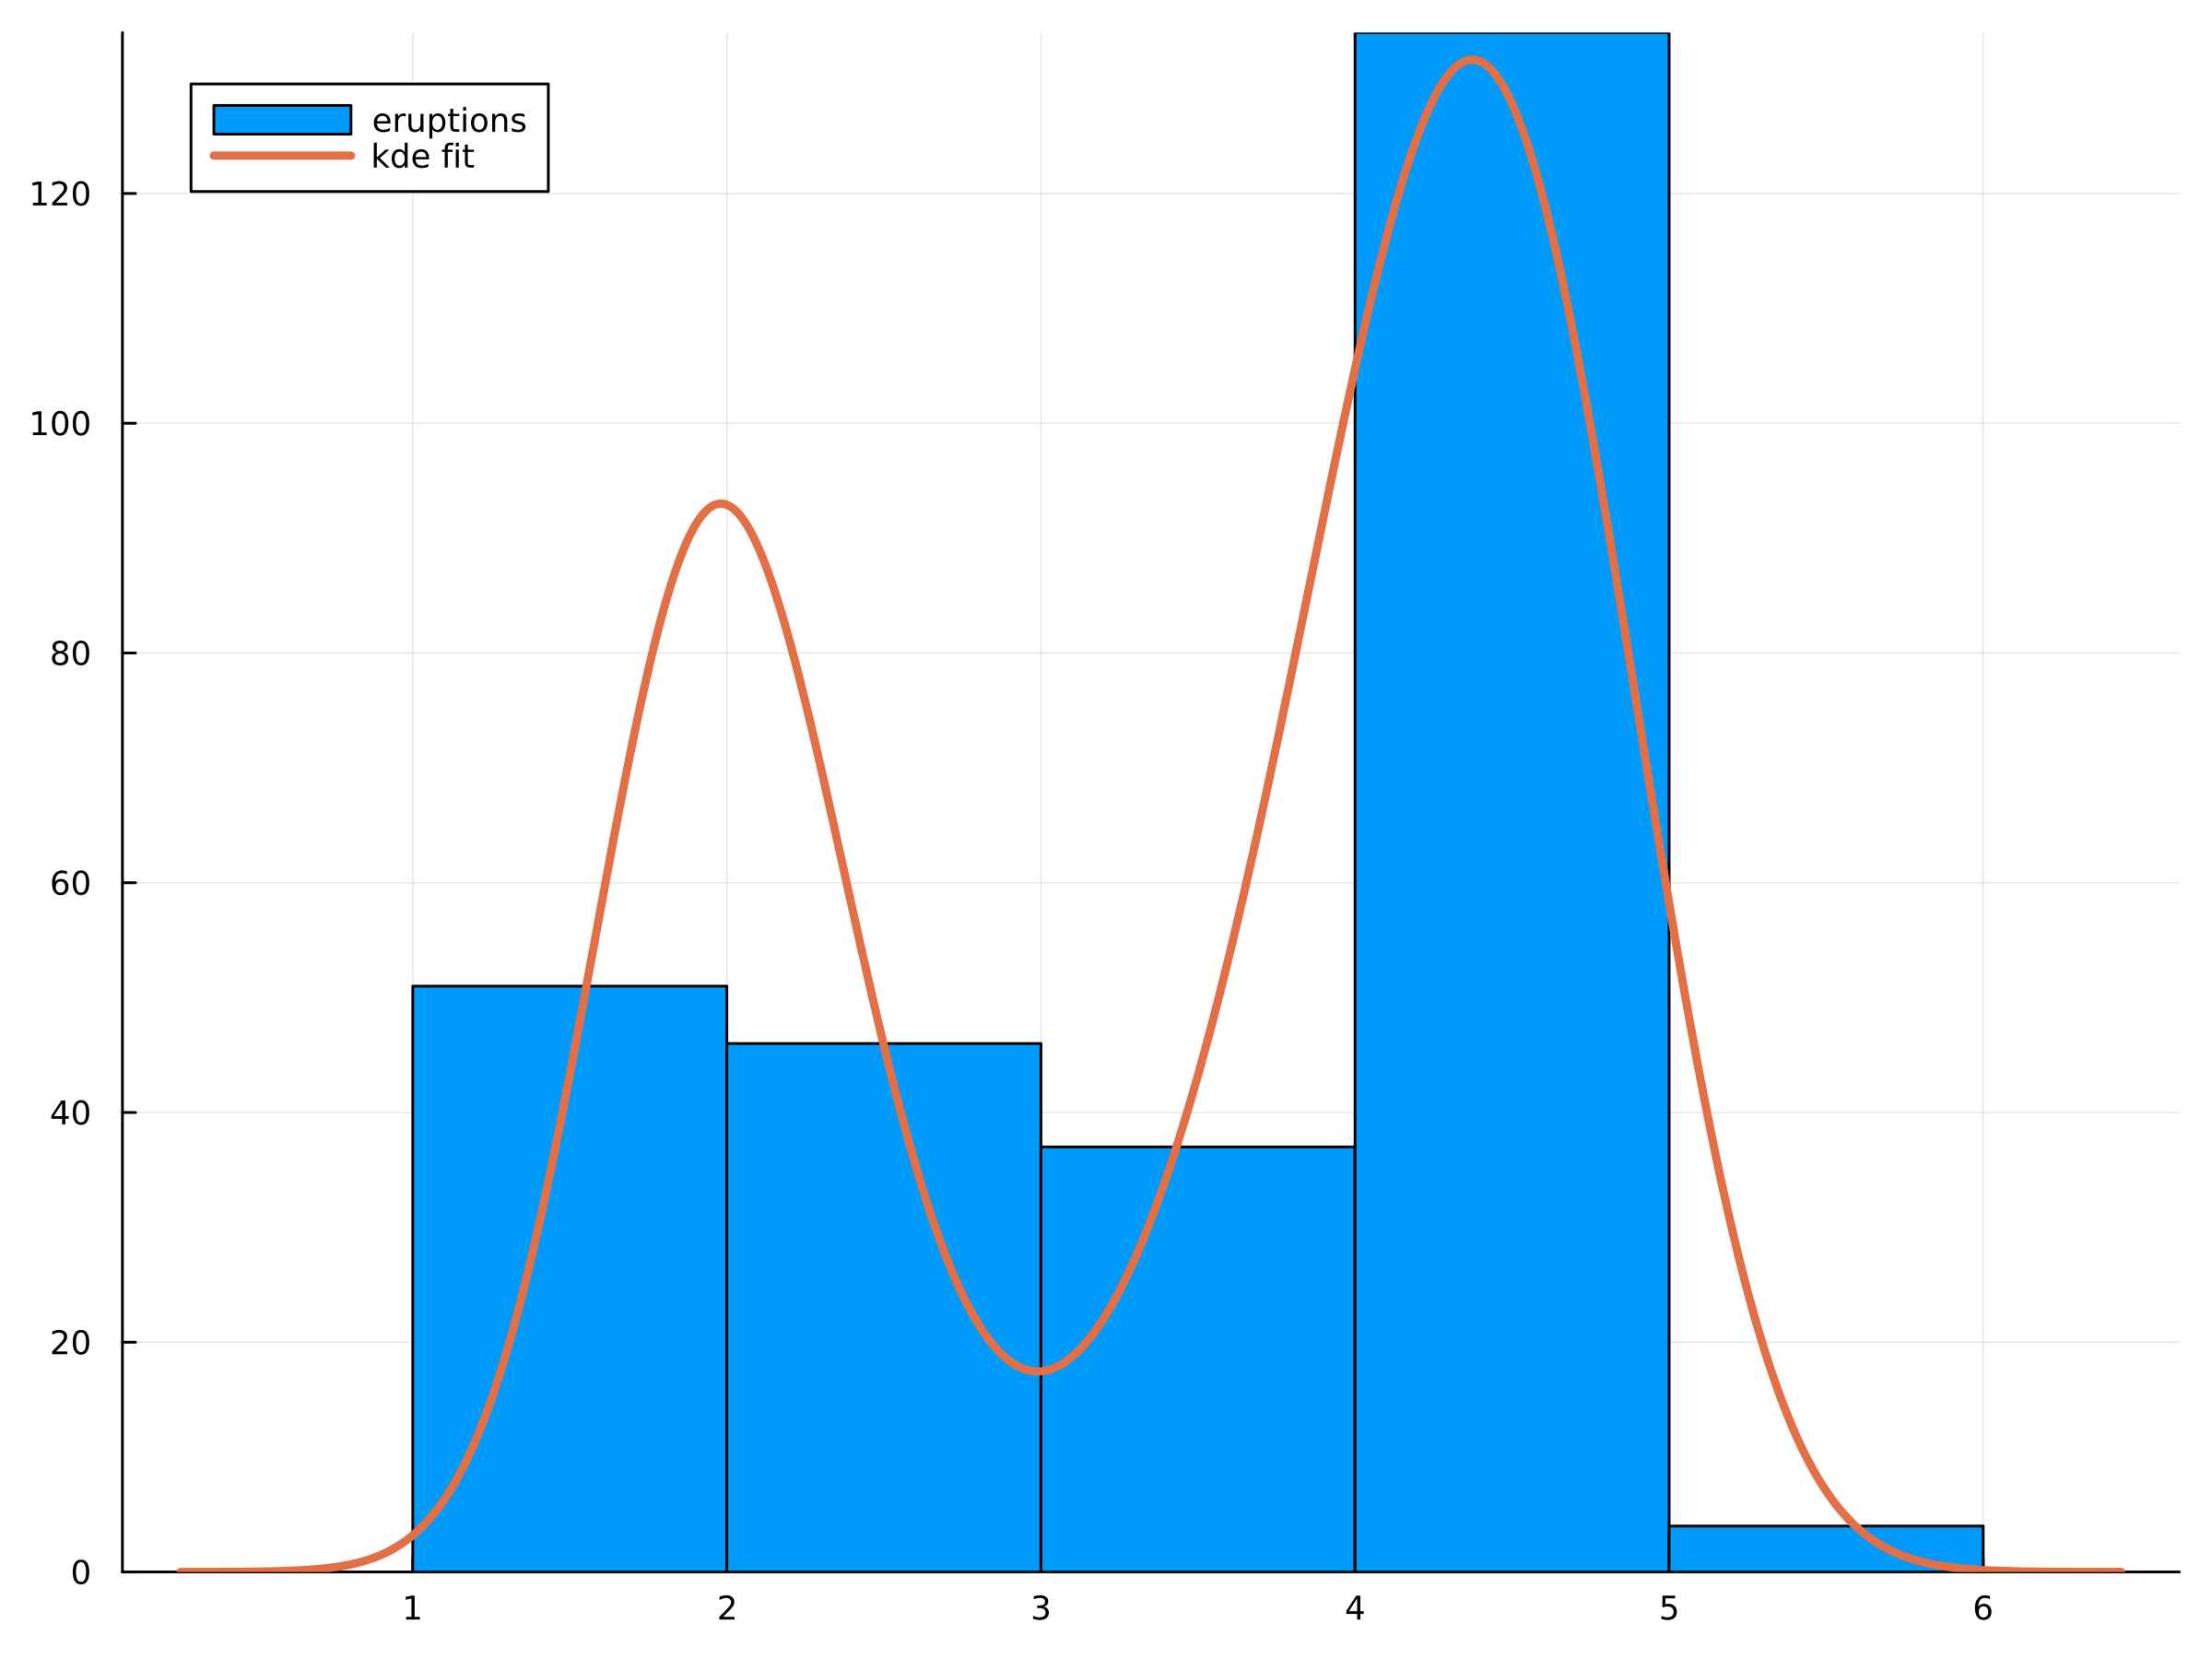

In [10]:
histogram(eruptions,label="eruptions")
plot!(p.x,p.density .* length(eruptions), linewidth=3,color=2,label="kde fit") # nb of elements*bin width

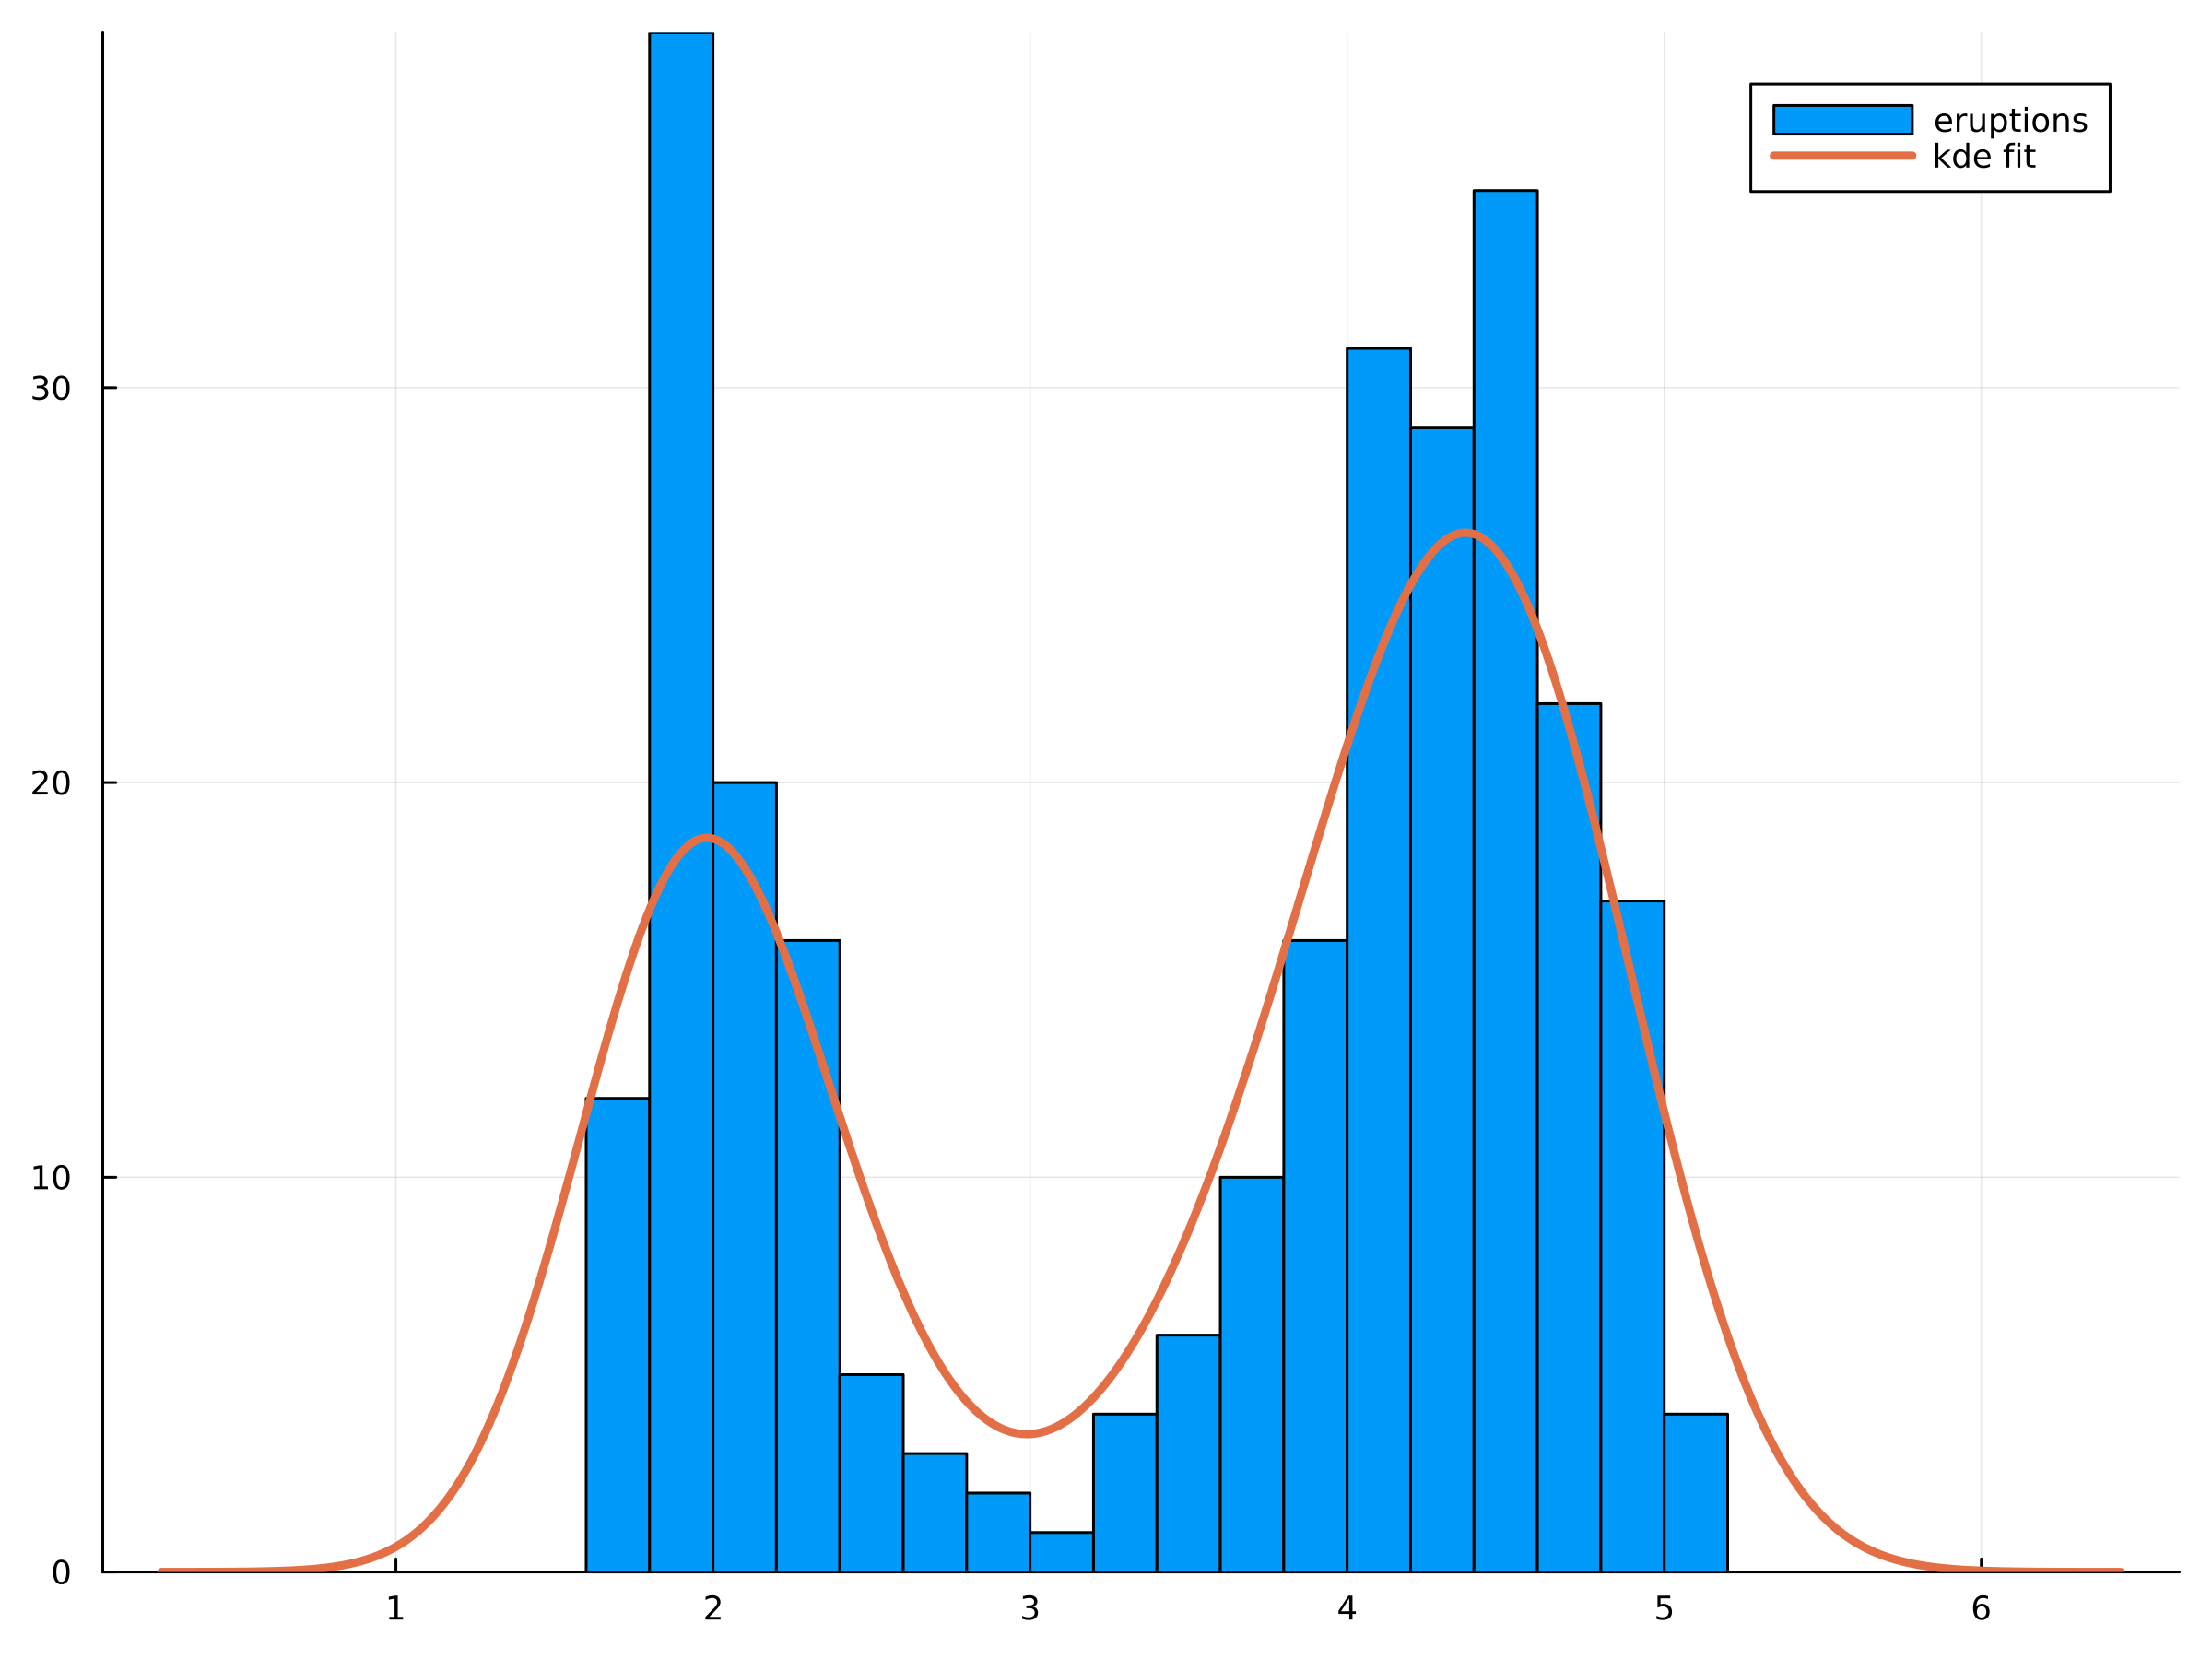

In [11]:
histogram(eruptions,bins=:sqrt,label="eruptions")
plot!(p.x,p.density .* length(eruptions) .*0.2, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

Next, we will take a look at one probablity distribution, namely the normal distribution and verify that it generates a bell curve.

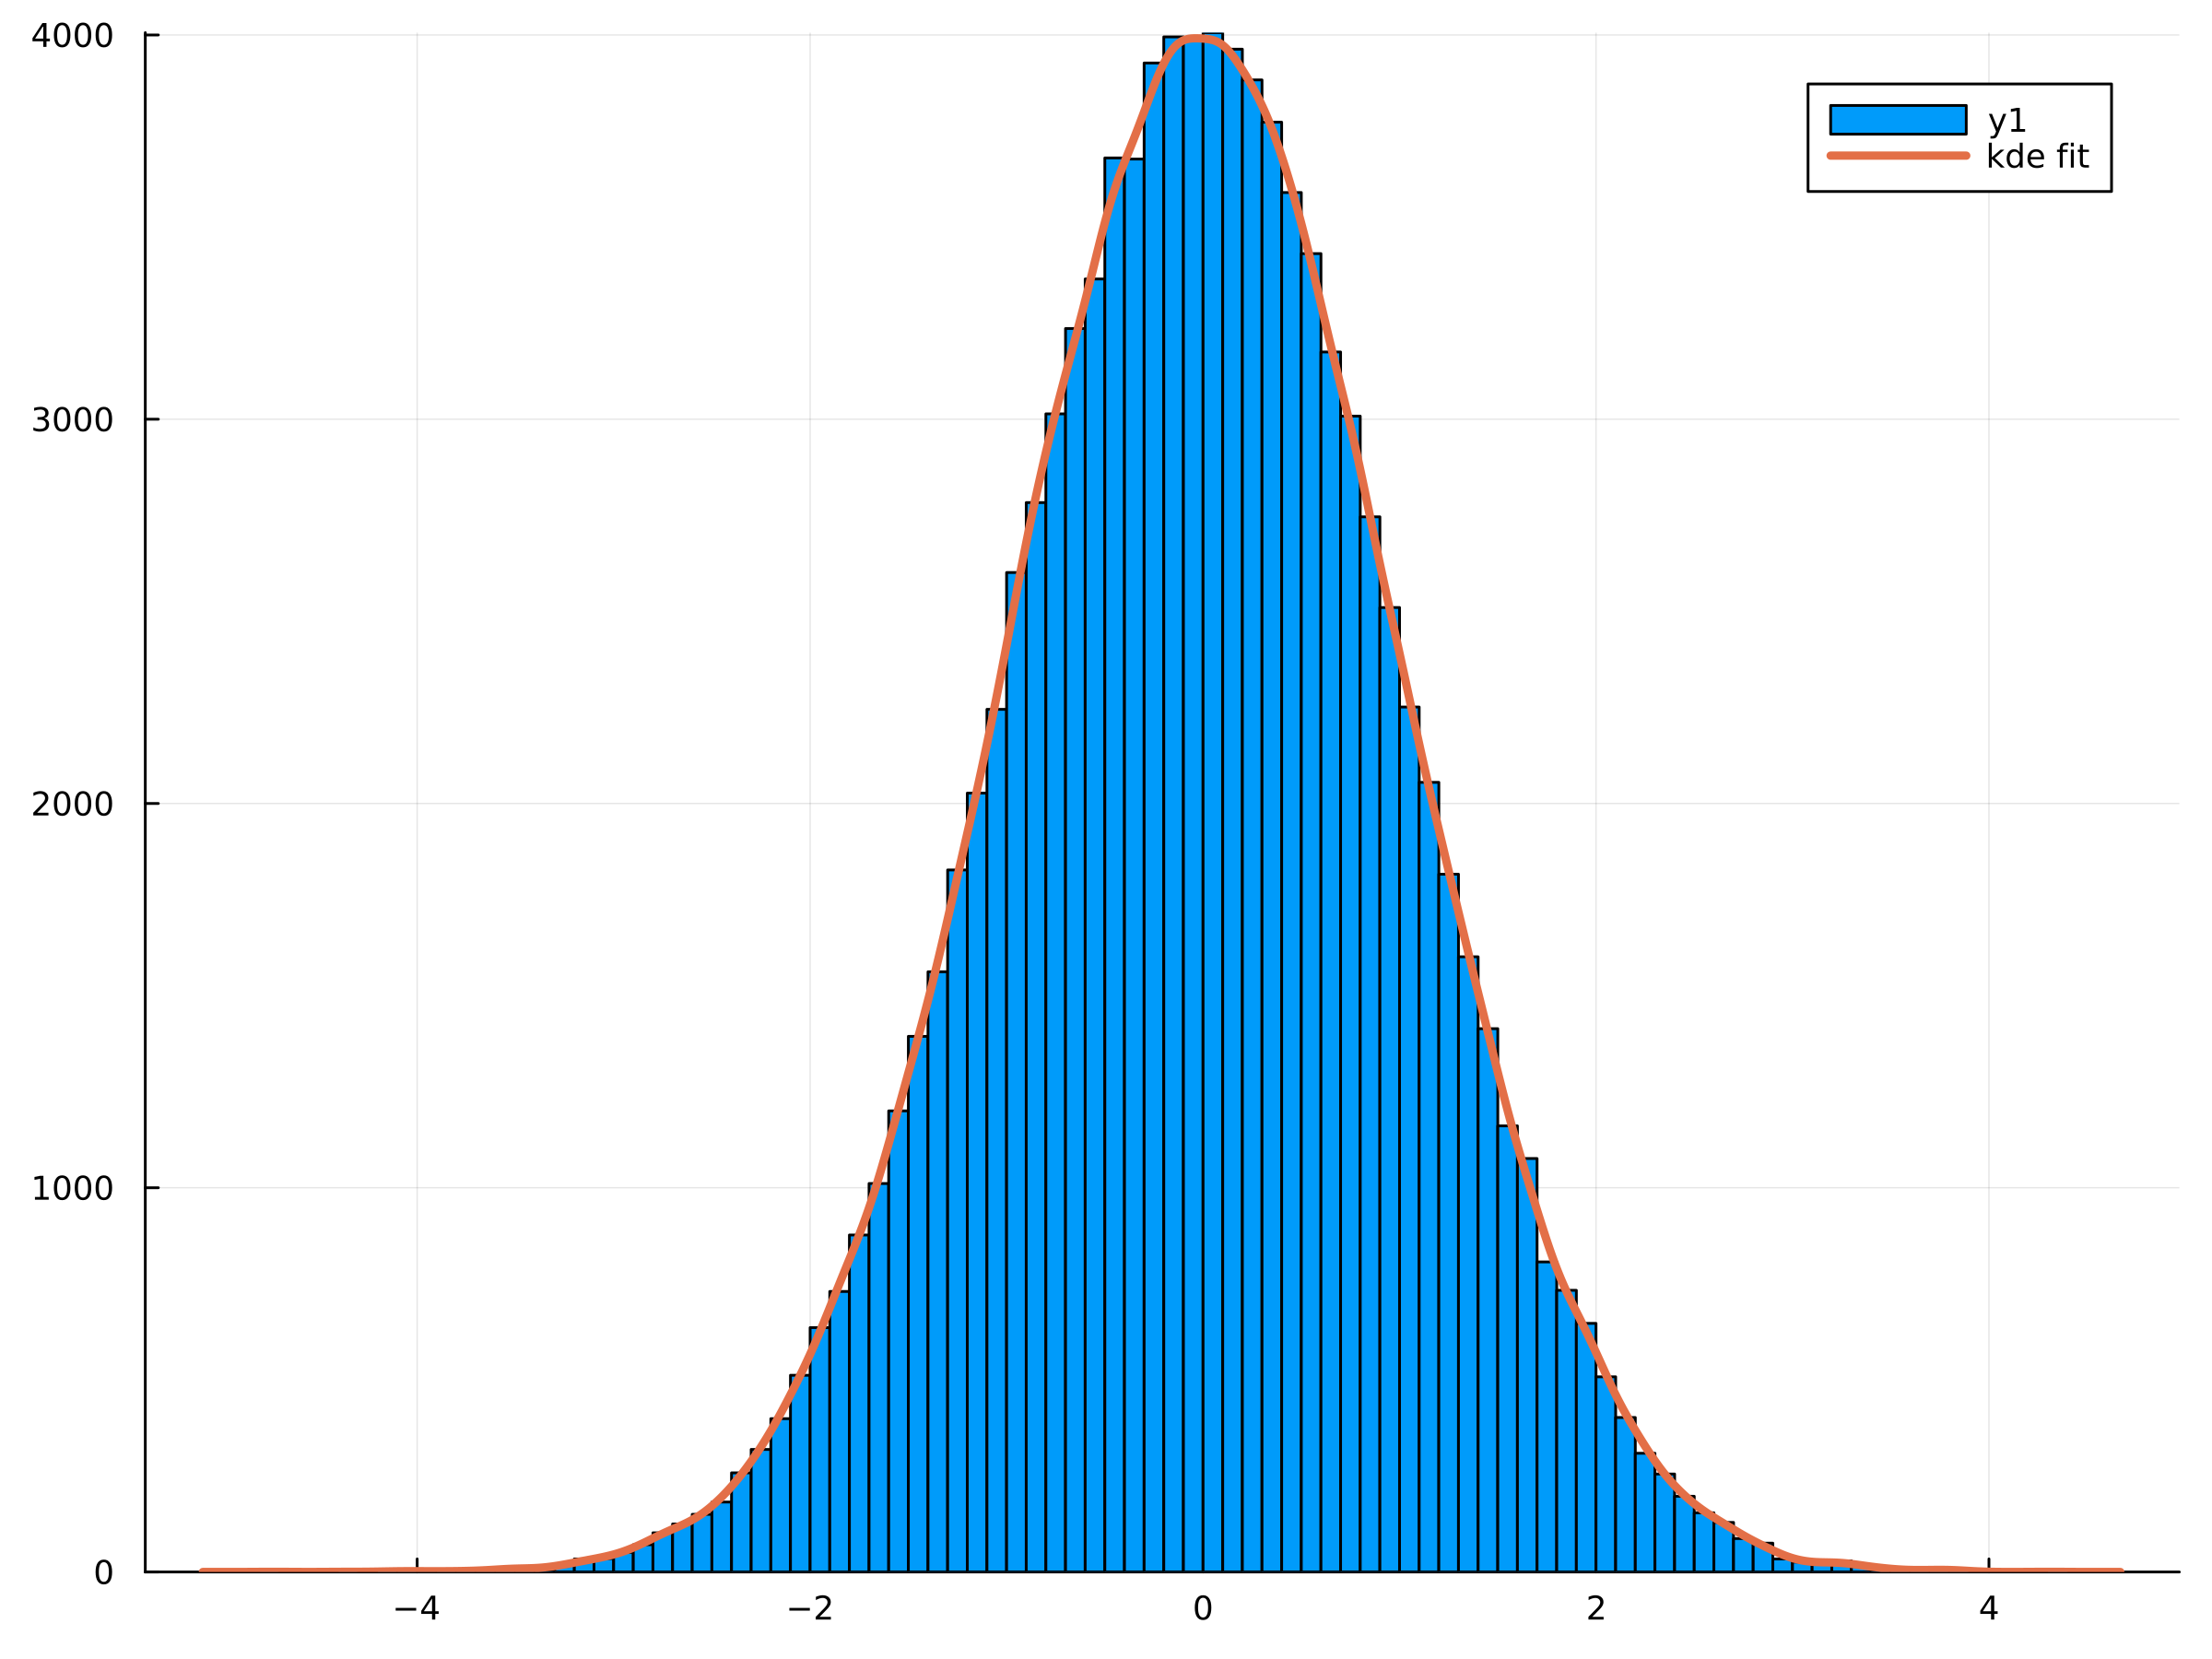

In [12]:
myrandomvector = randn(100_000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

### 🔵Probability distributions
Another way to generate the same plot is via using the `Distributions` package and choosing the probability distribution you want, and then drawing random numbers from it. As an example, we will use `d = Normal()` below.

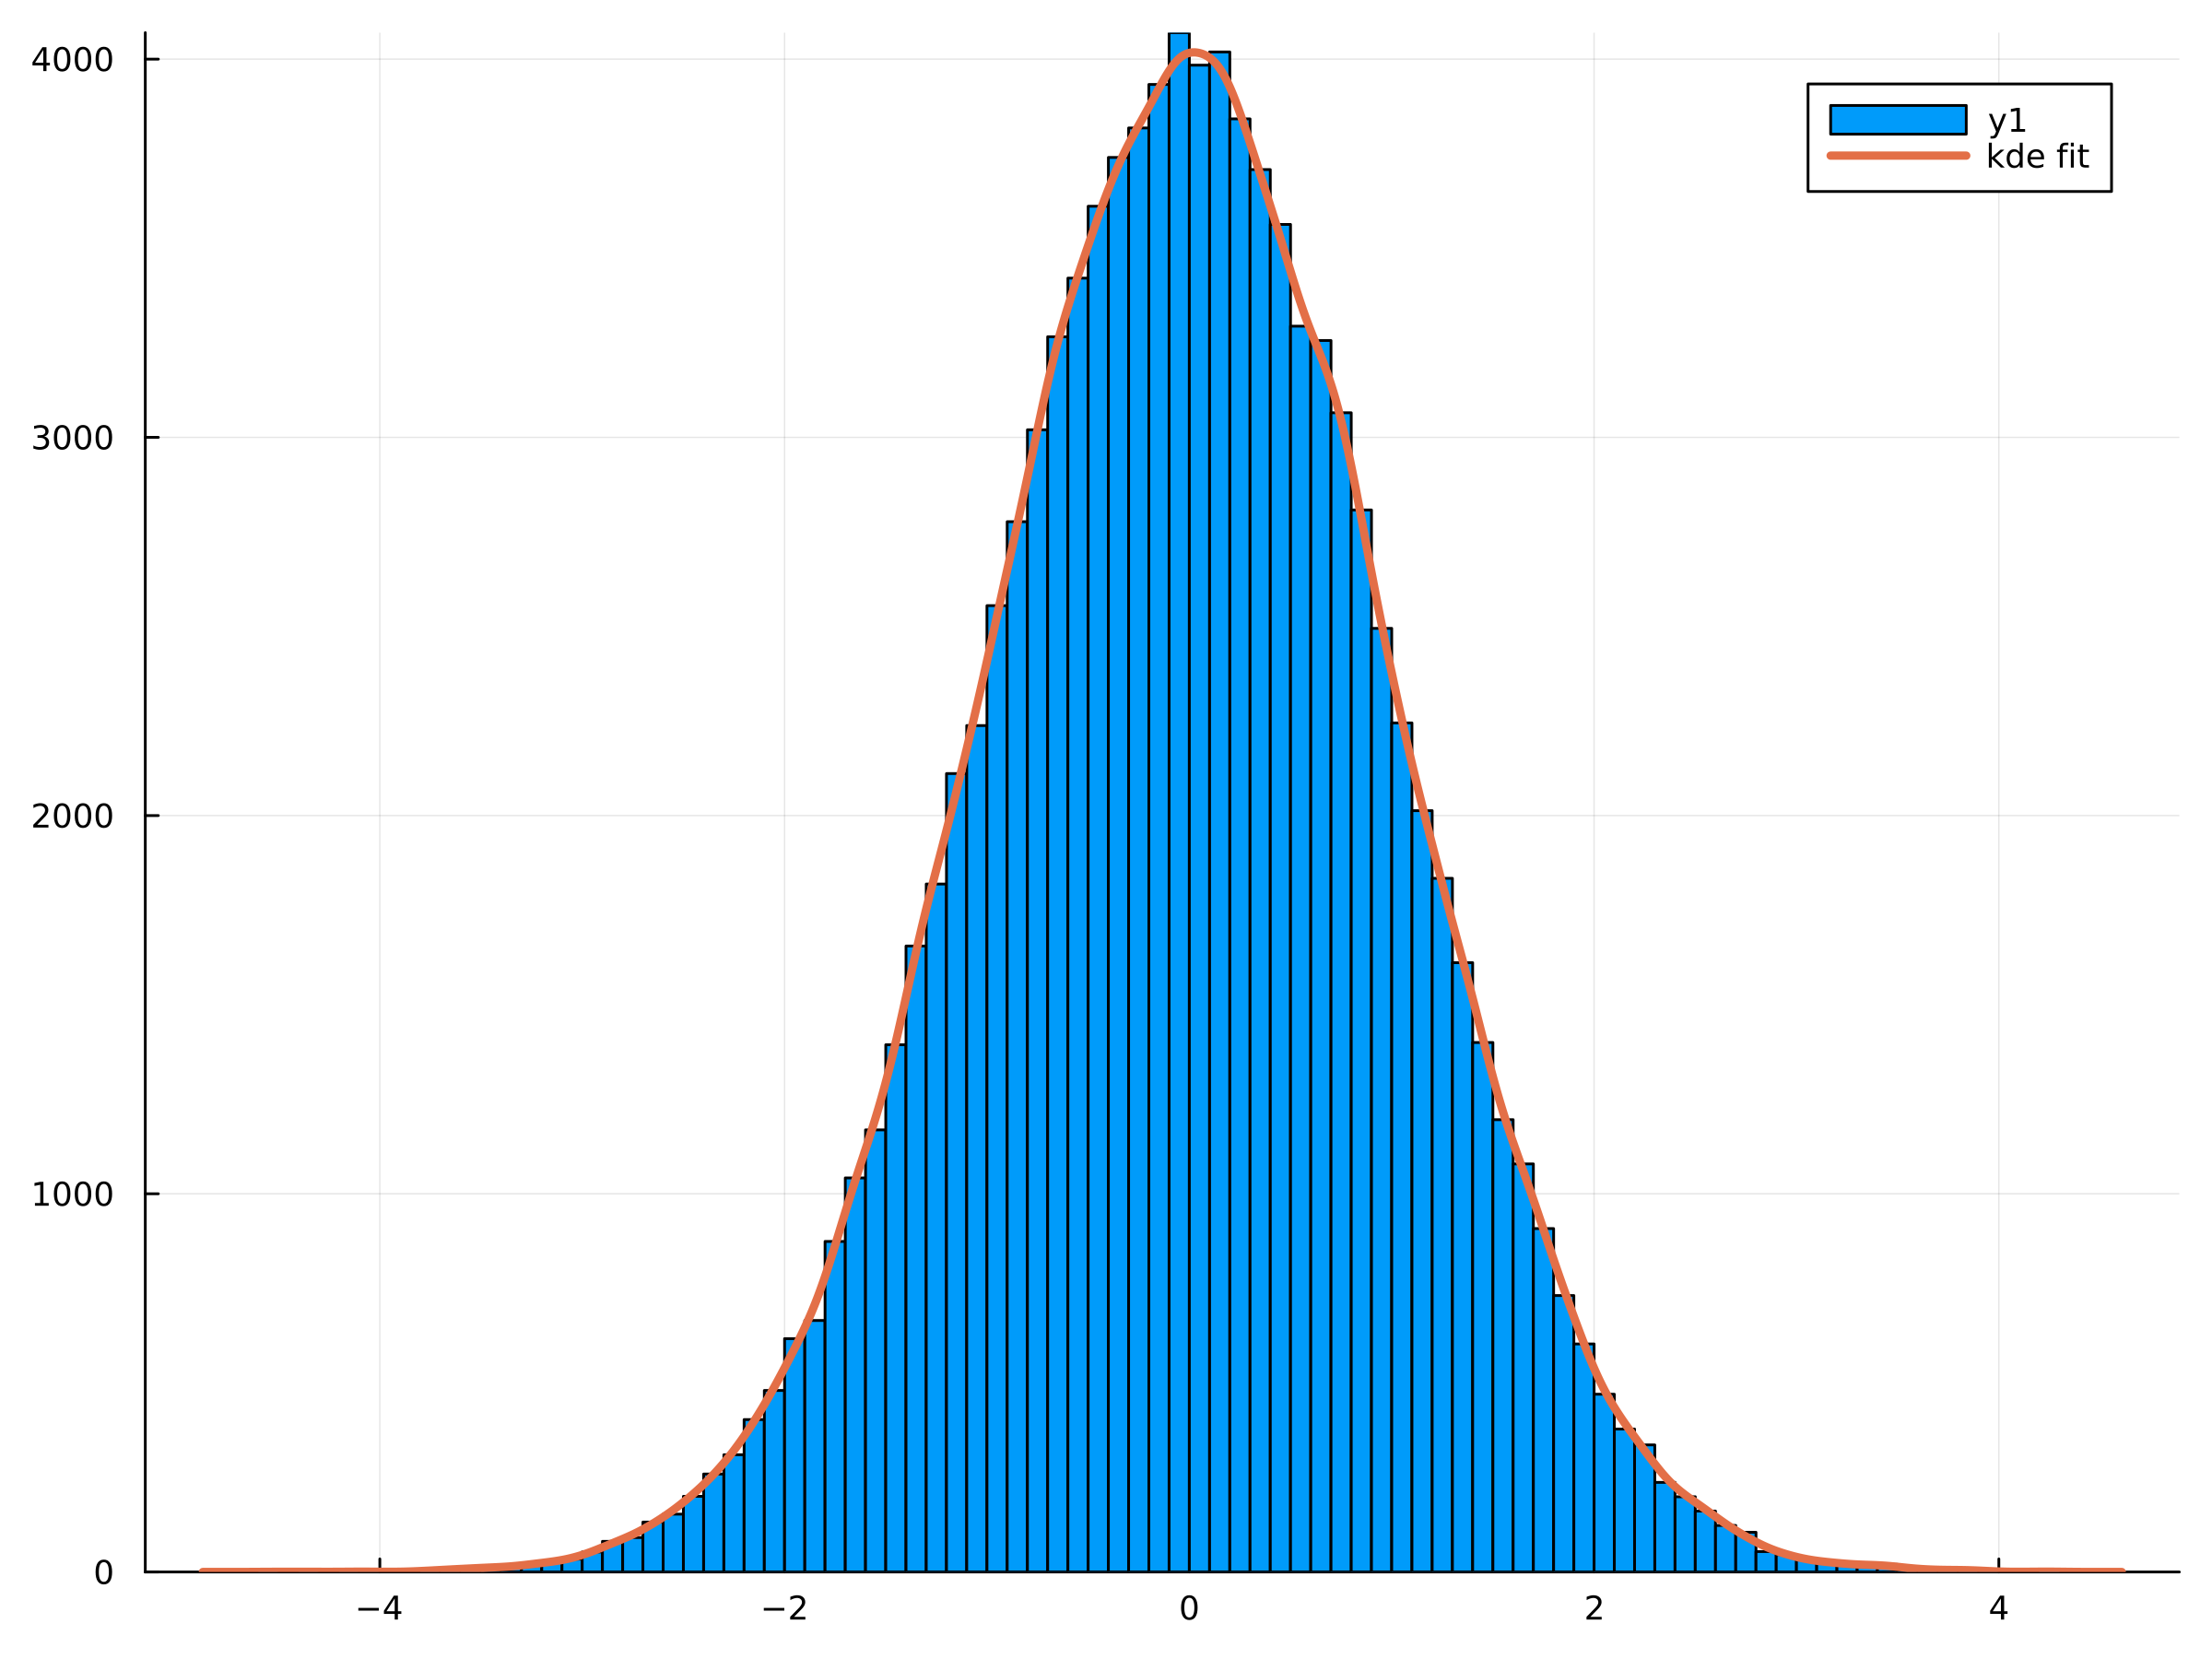

In [13]:
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

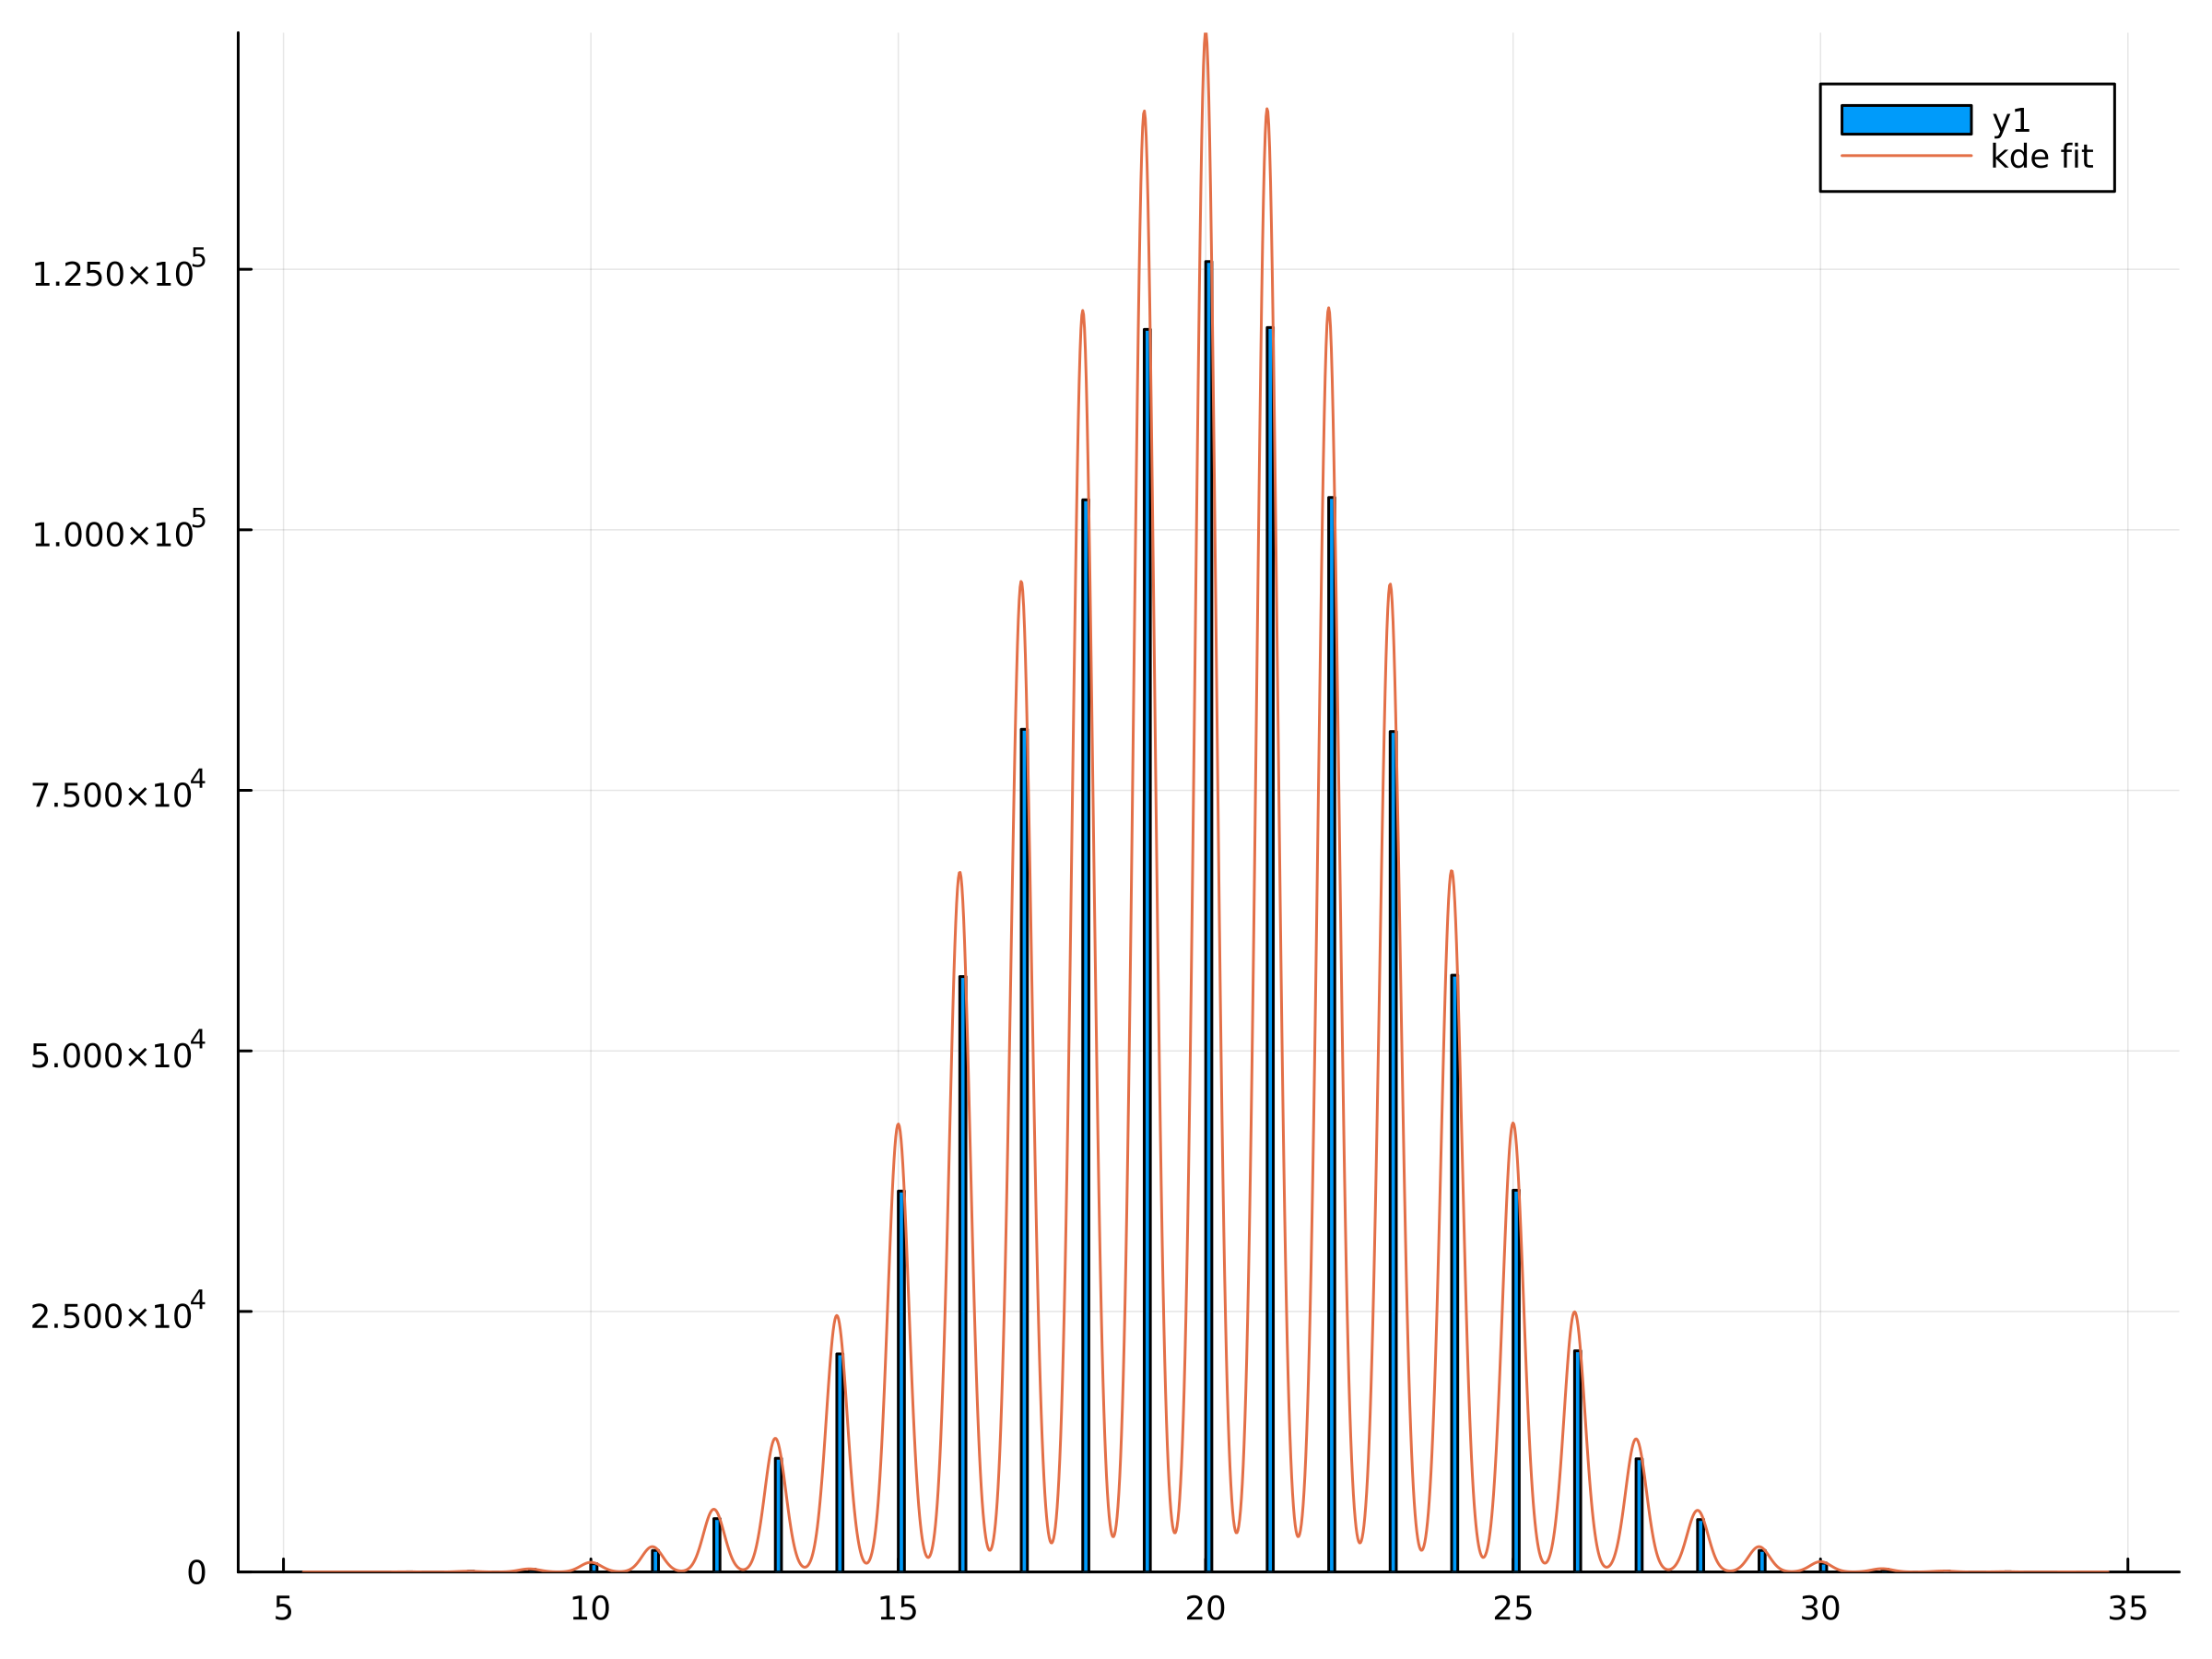

In [14]:
b = Binomial(40) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width

Next, we will try to fit a given set of numbers to a distribution.

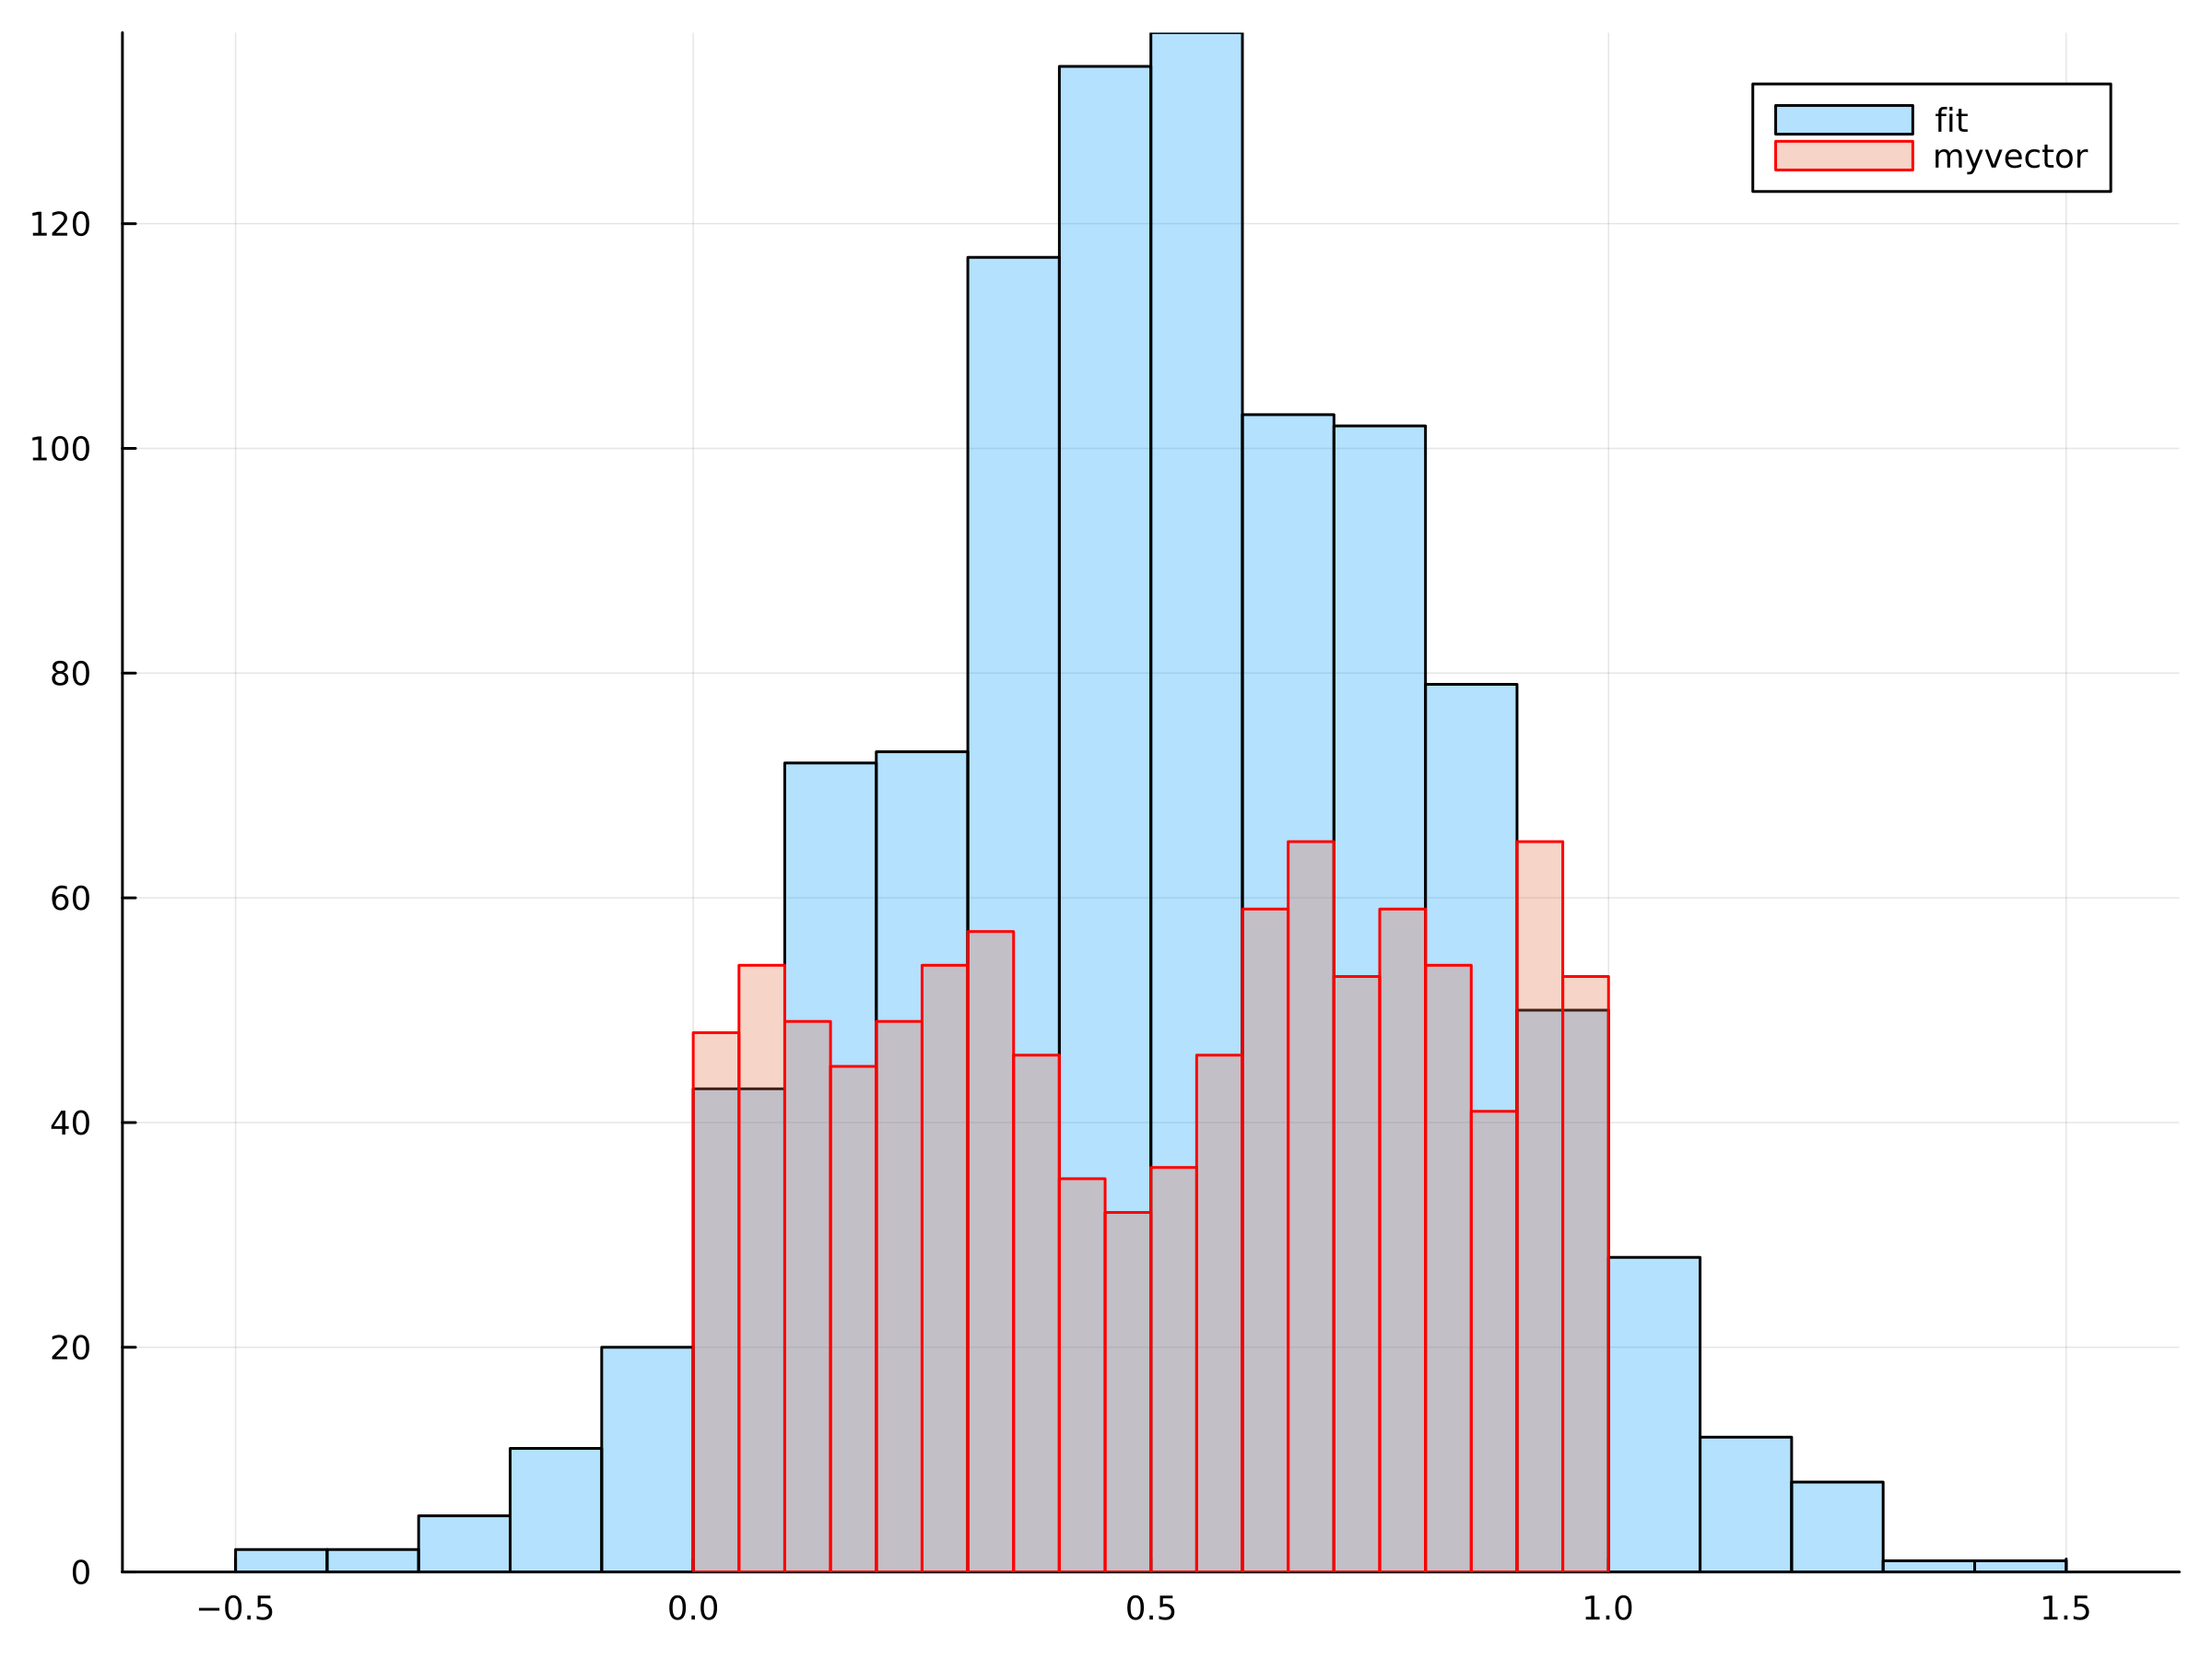

In [15]:
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

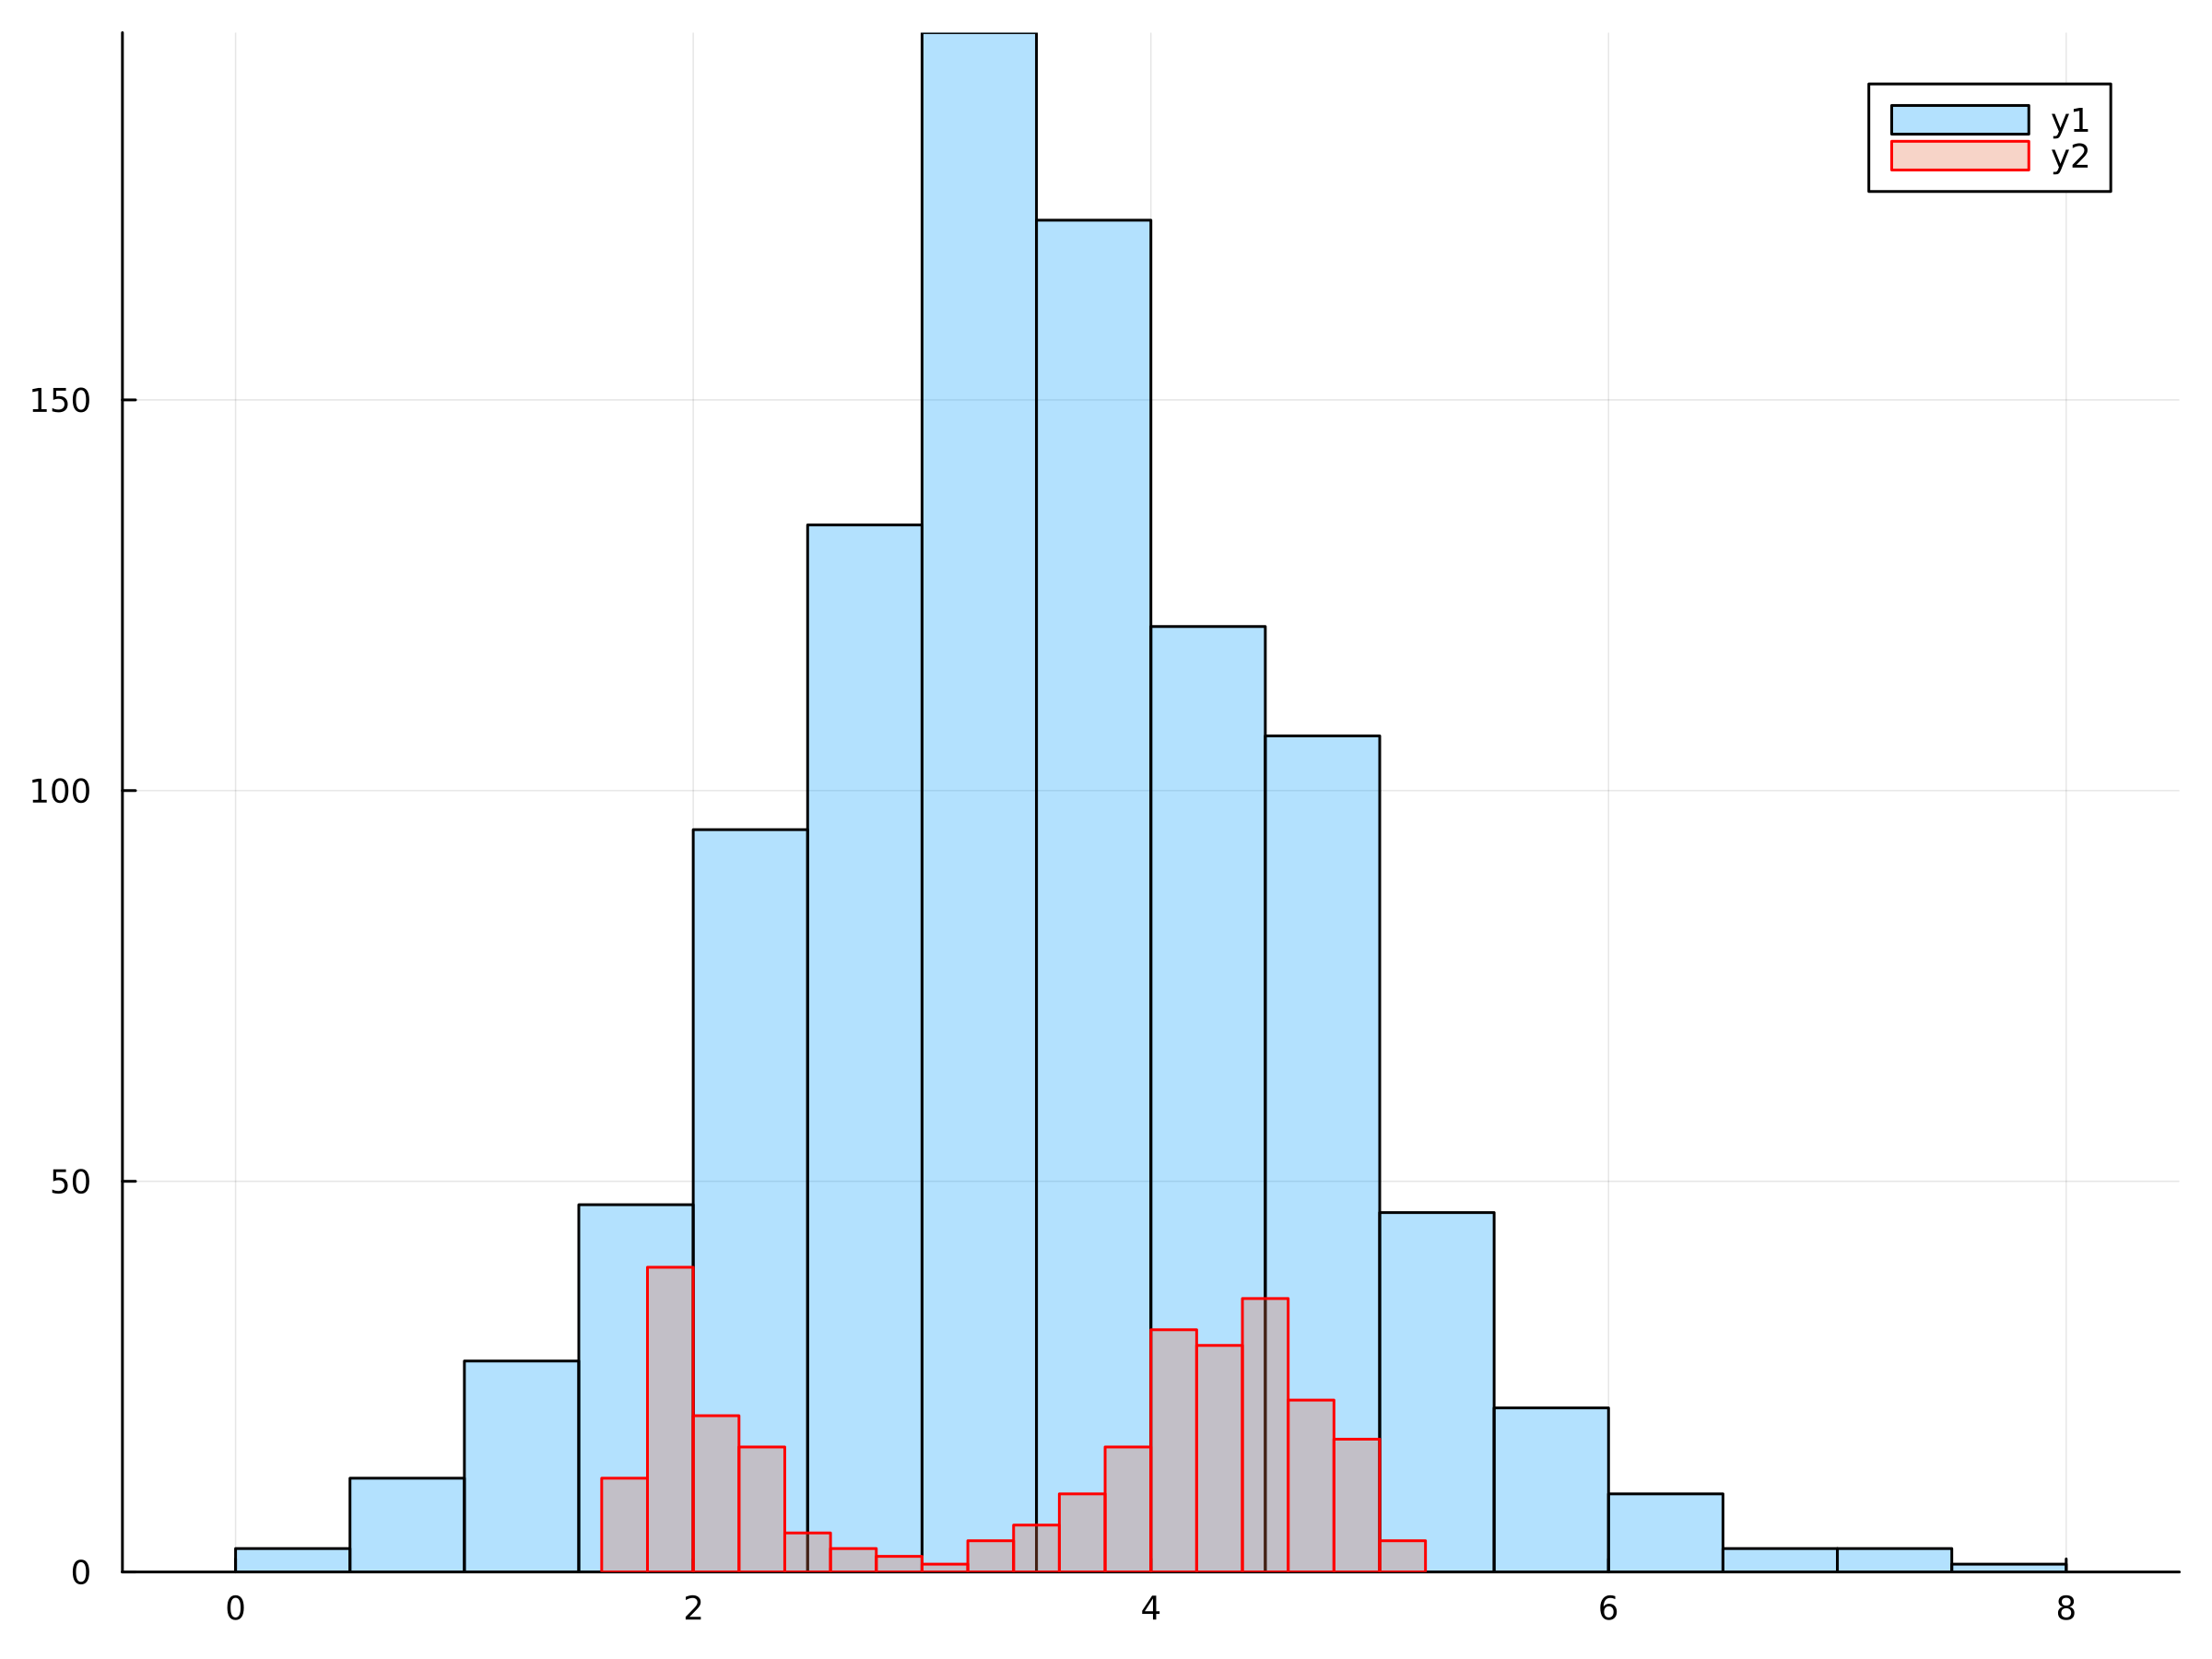

In [16]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3)

### 🔵Hypothesis testing
Next, we will perform hypothesis testing using the `HypothesisTests.jl` package.

In [17]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0583342
    95% confidence interval: (-0.002093, 0.1188)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.0585

Details:
    number of observations:   1000
    t-statistic:              1.894384211010229
    degrees of freedom:       999
    empirical standard error: 0.030793225524195642


In [18]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.352, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


In [19]:
CorrelationTest(eruptions, waittime)

Test for nonzero correlation
----------------------------
Population details:
    parameter of interest:   Correlation
    value under h_0:         0.0
    point estimate:          0.900811
    95% confidence interval: (0.8757, 0.9211)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:          272
    number of conditional variables: 0
    t-statistic:                     34.089
    degrees of freedom:              270


In [20]:
r_eruptions = tiedrank(eruptions)
r_waittime = tiedrank(waittime)
CorrelationTest(r_eruptions, r_waittime)

Test for nonzero correlation
----------------------------
Population details:
    parameter of interest:   Correlation
    value under h_0:         0.0
    point estimate:          0.777972
    95% confidence interval: (0.7262, 0.8209)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-55

Details:
    number of observations:          272
    number of conditional variables: 0
    t-statistic:                     20.346
    degrees of freedom:              270


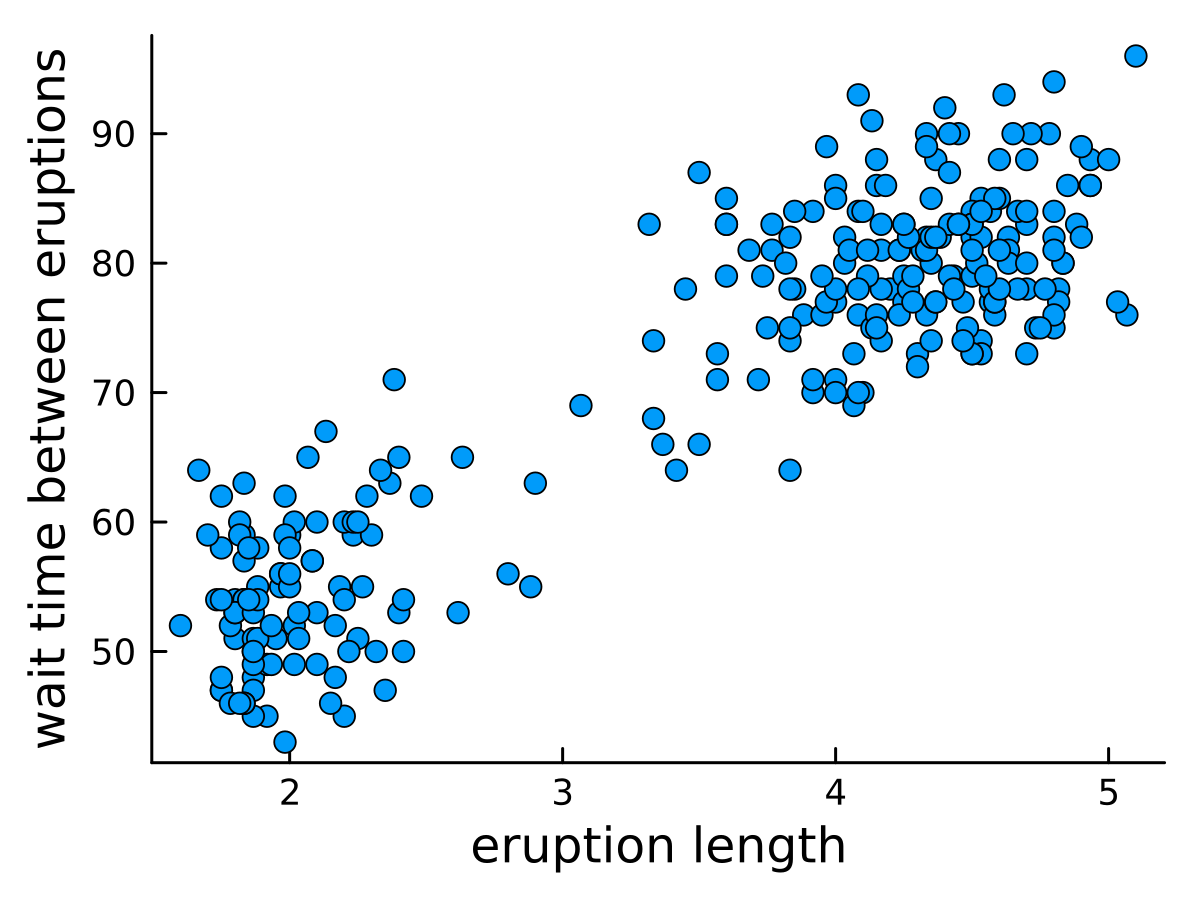

In [21]:
scatter(eruptions,waittime,xlabel="eruption length",
    ylabel="wait time between eruptions",legend=false,grid=false,size=(400,300))

Interesting! This means that the next time you visit Yellowstone National part ot see the faithful geysser and you have to wait for too long for it to go off, you will likely get a longer eruption! 

### 🔵AUC and Confusion matrix
Finally, we will cover basic tools you will need such as AUC scores or confusion matrix. We use the `MLBase` package for that.

In [22]:
gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)   

2×2 Matrix{Int64}:
 5  2
 1  0

In [23]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

0.8333333333333334

# Finally...
After finishing this notebook, you should be able to:
- generate statistics plots such as box plot, histogram, and kernel densities
- generate distributions in Julia, and draw random numbers accordingly
- fit a given set of numbers to a distribution
- compute basic evaluation metrics such as AUC and confusion matrix
- run hypothesis testing